# Index Tracking & Forward Testing 

## Importing the Data

In [1]:
import pandas as pd
const = pd.read_csv("const_prices.csv", parse_dates = ["Date"], index_col = "Date")
const

AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2000-09-01    1.132813   76.437500   51.150345   54.750000   18.656250   
2000-09-05    1.114955   72.500000   52.299175   55.437500   19.031250   
2000-09-06    1.043527   68.062500   52.518002   57.812500   19.343750   
2000-09-07    1.107143   72.000000   51.916229   58.500000   19.031250   
2000-09-08    1.051339   74.937500   53.065063   58.125000   18.906250   
...                ...         ...         ...         ...         ...   
2023-08-25  178.610001  256.380005  158.320007  223.410004  272.559998   
2023-08-28  180.190002  256.549988  159.190002  227.059998  274.790009   
2023-08-29  184.119995  259.640015  160.240005  227.250000  280.029999   
2023-08-30  187.649994  257.880005  160.169998  228.850006  282.329987   
2023-08-31  187.869995  256.339996  157.990005  224.029999  281.130005   

                   CRM       CSCO         CVX        DIS        DOW  ...  \
Date                                                                 ...   
2000-09-01         NaN  68.562500   42.734375  38.473499        NaN  ...   
2000-09-05         NaN  66.000000   42.968750  38.103561        NaN  ...   
2000-09-06         NaN  64.250000   44.062500  39.459999        NaN  ...   
2000-09-07         NaN  66.250000   44.156250  40.939751        NaN  ...   
2000-09-08         NaN  63.875000   43.343750  39.706627        NaN  ...   
...                ...        ...         ...        ...        ...  ...   
2023-08-25  209.470001  55.700001  159.119995  83.360001  53.980000  ...   
2023-08-28  211.720001  56.200001  160.210007  84.160004  54.599998  ...   
2023-08-29  211.960007  56.560001  159.960007  84.400002  55.240002  ...   
2023-08-30  215.039993  56.810001  160.179993  84.279999  54.750000  ...   
2023-08-31  221.460007  57.349998  161.100006  83.680000  54.560001  ...   

                   MRK        MSFT         NKE          PG         TRV  \
Date                                                                     
2000-09-01   66.018608   35.093750    5.109375   30.687500   46.812500   
2000-09-05   64.065483   35.062500    5.210938   31.250000   47.125000   
2000-09-06   62.977100   34.718750    5.000000   31.718750   48.312500   
2000-09-07   64.169846   35.031250    4.828125   31.312500   48.375000   
2000-09-08   64.438217   34.656250    4.890625   31.718750   49.312500   
...                ...         ...         ...         ...         ...   
2023-08-25  110.209999  322.980011   98.839996  153.539993  161.639999   
2023-08-28  108.930000  323.700012   99.629997  153.779999  160.830002   
2023-08-29  109.989998  328.410004  101.769997  153.869995  161.279999   
2023-08-30  110.209999  328.790009  102.099998  154.039993  161.320007   
2023-08-31  108.980003  327.760010  101.709999  154.339996  161.229996   

                   UNH           V         VZ        WBA         WMT  
Date                                                                  
2000-09-01   11.742188         NaN  39.626408  33.437500   48.750000  
2000-09-05   11.796875         NaN  39.120541  33.937500   49.750000  
2000-09-06   11.562500         NaN  38.333633  33.562500   50.000000  
2000-09-07   11.476563         NaN  39.232956  33.625000   51.000000  
2000-09-08   11.312500         NaN  39.851238  35.187500   52.125000  
...                ...         ...        ...        ...         ...  
2023-08-25  489.119995  242.570007  33.349998  25.260000  157.820007  
2023-08-28  491.279999  243.830002  33.549999  25.170000  158.720001  
2023-08-29  492.829987  245.339996  34.689999  25.540001  160.050003  
2023-08-30  491.529999  246.229996  34.639999  25.600000  161.199997  
2023-08-31  476.579987  245.679993  34.980000  25.309999  162.610001  

[5785 rows x 30 columns]

In [2]:
const.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-09-01 to 2023-08-31
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5785 non-null   float64
 1   AMGN    5785 non-null   float64
 2   AXP     5785 non-null   float64
 3   BA      5785 non-null   float64
 4   CAT     5785 non-null   float64
 5   CRM     4832 non-null   float64
 6   CSCO    5785 non-null   float64
 7   CVX     5785 non-null   float64
 8   DIS     5785 non-null   float64
 9   DOW     1122 non-null   float64
 10  GS      5785 non-null   float64
 11  HD      5785 non-null   float64
 12  HON     5785 non-null   float64
 13  IBM     5785 non-null   float64
 14  INTC    5785 non-null   float64
 15  JNJ     5785 non-null   float64
 16  JPM     5785 non-null   float64
 17  KO      5785 non-null   float64
 18  MCD     5785 non-null   float64
 19  MMM     5785 non-null   float64
 20  MRK     5785 non-null   float64
 21  MSFT    5785 non-nu

In [3]:
dji = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")
dji

Open          High           Low         Close  \
Date                                                                 
2000-09-01  11219.540039  11313.599609  11219.540039  11238.780273   
2000-09-05  11221.759766  11301.669922  11184.769531  11260.610352   
2000-09-06  11253.580078  11401.190430  11253.209961  11310.639648   
2000-09-07  11316.009766  11323.870117  11223.240234  11259.870117   
2000-09-08  11261.719727  11261.719727  11191.049805  11220.650391   
...                  ...           ...           ...           ...   
2023-08-25  34217.058594  34441.910156  34029.218750  34346.898438   
2023-08-28  34441.640625  34652.910156  34441.640625  34559.980469   
2023-08-29  34531.121094  34864.421875  34531.121094  34852.671875   
2023-08-30  34847.800781  35025.570312  34811.738281  34890.238281   
2023-08-31  34909.089844  35070.210938  34719.769531  34721.910156   

               Adj Close     Volume  
Date                                 
2000-09-01  11238.780273  125140000  
2000-09-05  11260.610352  174500000  
2000-09-06  11310.639648  224760000  
2000-09-07  11259.870117  222220000  
2000-09-08  11220.650391  181620000  
...                  ...        ...  
2023-08-25  34346.898438  257440000  
2023-08-28  34559.980469  224640000  
2023-08-29  34852.671875  262550000  
2023-08-30  34890.238281  236070000  
2023-08-31  34721.910156  341900000  

[5785 rows x 6 columns]

In [4]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-09-01 to 2023-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5785 non-null   float64
 1   High       5785 non-null   float64
 2   Low        5785 non-null   float64
 3   Close      5785 non-null   float64
 4   Adj Close  5785 non-null   float64
 5   Volume     5785 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 316.4 KB


In [5]:
dji = dji.Close.to_frame().copy()
dji

Close
Date                    
2000-09-01  11238.780273
2000-09-05  11260.610352
2000-09-06  11310.639648
2000-09-07  11259.870117
2000-09-08  11220.650391
...                  ...
2023-08-25  34346.898438
2023-08-28  34559.980469
2023-08-29  34852.671875
2023-08-30  34890.238281
2023-08-31  34721.910156

[5785 rows x 1 columns]

In [6]:
df = pd.concat([const, dji], axis = 1)
df.rename(columns = {"Close": "DJI"}, inplace = True)
df

AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2000-09-01    1.132813   76.437500   51.150345   54.750000   18.656250   
2000-09-05    1.114955   72.500000   52.299175   55.437500   19.031250   
2000-09-06    1.043527   68.062500   52.518002   57.812500   19.343750   
2000-09-07    1.107143   72.000000   51.916229   58.500000   19.031250   
2000-09-08    1.051339   74.937500   53.065063   58.125000   18.906250   
...                ...         ...         ...         ...         ...   
2023-08-25  178.610001  256.380005  158.320007  223.410004  272.559998   
2023-08-28  180.190002  256.549988  159.190002  227.059998  274.790009   
2023-08-29  184.119995  259.640015  160.240005  227.250000  280.029999   
2023-08-30  187.649994  257.880005  160.169998  228.850006  282.329987   
2023-08-31  187.869995  256.339996  157.990005  224.029999  281.130005   

                   CRM       CSCO         CVX        DIS        DOW  ...  \
Date                                                                 ...   
2000-09-01         NaN  68.562500   42.734375  38.473499        NaN  ...   
2000-09-05         NaN  66.000000   42.968750  38.103561        NaN  ...   
2000-09-06         NaN  64.250000   44.062500  39.459999        NaN  ...   
2000-09-07         NaN  66.250000   44.156250  40.939751        NaN  ...   
2000-09-08         NaN  63.875000   43.343750  39.706627        NaN  ...   
...                ...        ...         ...        ...        ...  ...   
2023-08-25  209.470001  55.700001  159.119995  83.360001  53.980000  ...   
2023-08-28  211.720001  56.200001  160.210007  84.160004  54.599998  ...   
2023-08-29  211.960007  56.560001  159.960007  84.400002  55.240002  ...   
2023-08-30  215.039993  56.810001  160.179993  84.279999  54.750000  ...   
2023-08-31  221.460007  57.349998  161.100006  83.680000  54.560001  ...   

                  MSFT         NKE          PG         TRV         UNH  \
Date                                                                     
2000-09-01   35.093750    5.109375   30.687500   46.812500   11.742188   
2000-09-05   35.062500    5.210938   31.250000   47.125000   11.796875   
2000-09-06   34.718750    5.000000   31.718750   48.312500   11.562500   
2000-09-07   35.031250    4.828125   31.312500   48.375000   11.476563   
2000-09-08   34.656250    4.890625   31.718750   49.312500   11.312500   
...                ...         ...         ...         ...         ...   
2023-08-25  322.980011   98.839996  153.539993  161.639999  489.119995   
2023-08-28  323.700012   99.629997  153.779999  160.830002  491.279999   
2023-08-29  328.410004  101.769997  153.869995  161.279999  492.829987   
2023-08-30  328.790009  102.099998  154.039993  161.320007  491.529999   
2023-08-31  327.760010  101.709999  154.339996  161.229996  476.579987   

                     V         VZ        WBA         WMT           DJI  
Date                                                                    
2000-09-01         NaN  39.626408  33.437500   48.750000  11238.780273  
2000-09-05         NaN  39.120541  33.937500   49.750000  11260.610352  
2000-09-06         NaN  38.333633  33.562500   50.000000  11310.639648  
2000-09-07         NaN  39.232956  33.625000   51.000000  11259.870117  
2000-09-08         NaN  39.851238  35.187500   52.125000  11220.650391  
...                ...        ...        ...         ...           ...  
2023-08-25  242.570007  33.349998  25.260000  157.820007  34346.898438  
2023-08-28  243.830002  33.549999  25.170000  158.720001  34559.980469  
2023-08-29  245.339996  34.689999  25.540001  160.050003  34852.671875  
2023-08-30  246.229996  34.639999  25.600000  161.199997  34890.238281  
2023-08-31  245.679993  34.980000  25.309999  162.610001  34721.910156  

[5785 rows x 31 columns]

In [7]:
more_info = pd.read_csv("const.csv")
more_info

Company Exchange Symbol                        Industry  \
0                         3M     NYSE    MMM                    Conglomerate   
1           American Express     NYSE    AXP              Financial services   
2                      Amgen   NASDAQ   AMGN               Biopharmaceutical   
3                      Apple   NASDAQ   AAPL          Information technology   
4                     Boeing     NYSE     BA           Aerospace and defense   
5                Caterpillar     NYSE    CAT         Construction and mining   
6                    Chevron     NYSE    CVX              Petroleum industry   
7                      Cisco   NASDAQ   CSCO          Information technology   
8                  Coca-Cola     NYSE     KO                  Drink industry   
9                     Disney     NYSE    DIS  Broadcasting and entertainment   
10                       Dow     NYSE    DOW               Chemical industry   
11             Goldman Sachs     NYSE     GS              Financial services   
12                Home Depot     NYSE     HD                Home Improvement   
13                 Honeywell   NASDAQ    HON                    Conglomerate   
14                       IBM     NYSE    IBM          Information technology   
15                     Intel   NASDAQ   INTC          Semiconductor industry   
16         Johnson & Johnson     NYSE    JNJ         Pharmaceutical industry   
17            JPMorgan Chase     NYSE    JPM              Financial services   
18                McDonald's     NYSE    MCD                   Food industry   
19                     Merck     NYSE    MRK         Pharmaceutical industry   
20                 Microsoft   NASDAQ   MSFT          Information technology   
21                      Nike     NYSE    NKE               Clothing industry   
22          Procter & Gamble     NYSE     PG      Fast-moving consumer goods   
23                Salesforce     NYSE    CRM          Information technology   
24                 Travelers     NYSE    TRV                       Insurance   
25        UnitedHealth Group     NYSE    UNH             Managed health care   
26                   Verizon     NYSE     VZ     Telecommunications industry   
27                      Visa     NYSE      V              Financial services   
28  Walgreens Boots Alliance   NASDAQ    WBA                       Retailing   
29                   Walmart     NYSE    WMT                       Retailing   

    Date_Added Ticker  
0   1976-08-09    MMM  
1   1982-08-30    AXP  
2   2020-08-31   AMGN  
3   2015-03-19   AAPL  
4   1987-03-12     BA  
5   1991-05-06    CAT  
6   2008-02-19    CVX  
7   2009-06-08   CSCO  
8   1987-03-12     KO  
9   1991-05-06    DIS  
10  1991-05-06    DOW  
11  2019-04-02     GS  
12  1999-11-01     HD  
13  2020-08-31    HON  
14  1979-06-29    IBM  
15  1999-11-01   INTC  
16  1997-03-17    JNJ  
17  1991-05-06    JPM  
18  1985-10-30    MCD  
19  1979-06-29    MRK  
20  1999-11-01   MSFT  
21  2013-09-20    NKE  
22  1932-05-26     PG  
23  2020-08-31    CRM  
24  2009-06-08    TRV  
25  2012-09-24    UNH  
26  2004-04-08     VZ  
27  2013-09-20      V  
28  2018-06-26    WBA  
29  1997-03-17    WMT

## Transforming the Data

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

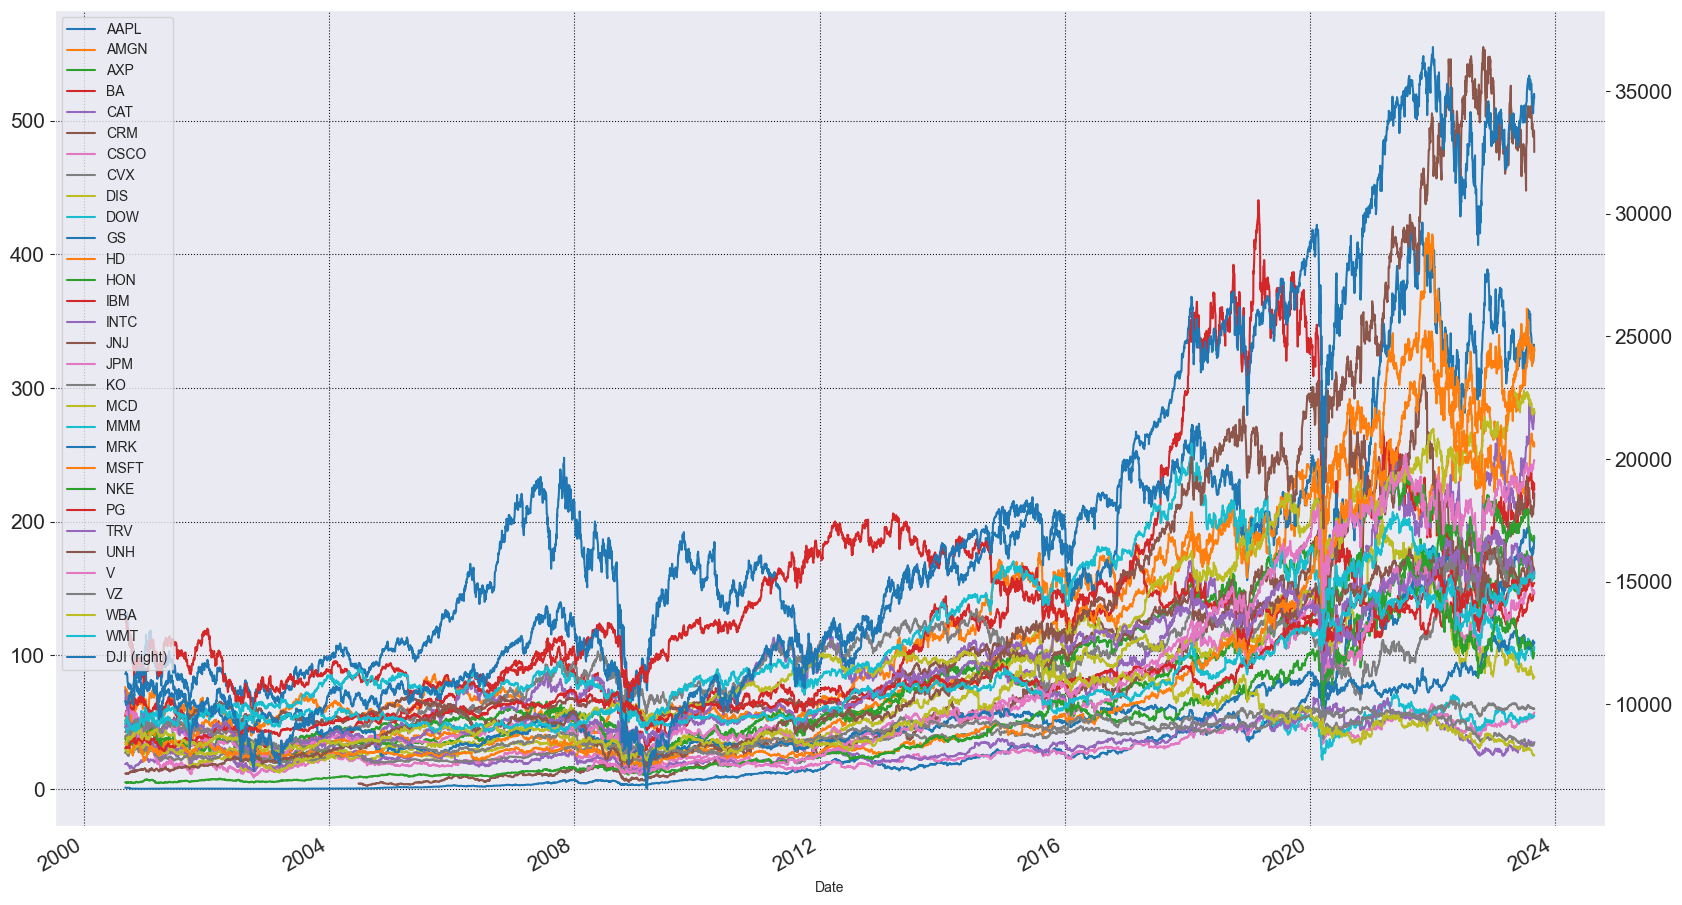

In [9]:
sns.set_style("darkgrid", {"grid.color": ".1", "grid.linestyle": ":"})
df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "DJI")
plt.show()

In [10]:
df.div(df.iloc[0]).mul(100)

AAPL        AMGN         AXP          BA          CAT  \
Date                                                                        
2000-09-01    100.000000  100.000000  100.000000  100.000000   100.000000   
2000-09-05     98.423568   94.848733  102.245988  101.255708   102.010050   
2000-09-06     92.118207   89.043336  102.673798  105.593607   103.685092   
2000-09-07     97.733966   94.194603  101.497320  106.849315   102.010050   
2000-09-08     92.807820   98.037612  103.743315  106.164384   101.340034   
...                  ...         ...         ...         ...          ...   
2023-08-25  15766.945141  335.411290  309.518944  408.054801  1460.958111   
2023-08-28  15906.421106  335.633672  311.219803  414.721457  1472.911269   
2023-08-29  16253.344452  339.676225  313.272581  415.068493  1500.998318   
2023-08-30  16564.958006  337.373678  313.135715  417.990879  1513.326561   
2023-08-31  16584.378795  335.358949  308.873784  409.187212  1506.894499   

            CRM        CSCO         CVX         DIS  DOW  ...        MSFT  \
Date                                                      ...               
2000-09-01  NaN  100.000000  100.000000  100.000000  NaN  ...  100.000000   
2000-09-05  NaN   96.262534  100.548446   99.038460  NaN  ...   99.910953   
2000-09-06  NaN   93.710119  103.107861  102.564102  NaN  ...   98.931434   
2000-09-07  NaN   96.627165  103.327239  106.410260  NaN  ...   99.821906   
2000-09-08  NaN   93.163172  101.425960  103.205135  NaN  ...   98.753339   
...         ...         ...         ...         ...  ...  ...         ...   
2023-08-25  NaN   81.239746  372.346606  216.668622  NaN  ...  920.334849   
2023-08-28  NaN   81.969007  374.897273  218.747983  NaN  ...  922.386500   
2023-08-29  NaN   82.494077  374.312264  219.371783  NaN  ...  935.807668   
2023-08-30  NaN   82.858708  374.827040  219.059873  NaN  ...  936.890496   
2023-08-31  NaN   83.646306  376.979905  217.500362  NaN  ...  933.955504   

                    NKE          PG         TRV          UNH   V          VZ  \
Date                                                                           
2000-09-01   100.000000  100.000000  100.000000   100.000000 NaN  100.000000   
2000-09-05   101.987777  101.832994  100.667557   100.465727 NaN   98.723409   
2000-09-06    97.859327  103.360489  103.204272    98.469719 NaN   96.737594   
2000-09-07    94.495413  102.036660  103.337784    97.737858 NaN   99.007097   
2000-09-08    95.718654  103.360489  105.340454    96.340644 NaN  100.567376   
...                 ...         ...         ...          ...  ..         ...   
2023-08-25  1934.483109  500.333990  345.292389  4165.492634 NaN   84.161044   
2023-08-28  1949.944900  501.116086  343.562087  4183.887873 NaN   84.665760   
2023-08-29  1991.828680  501.409353  344.523362  4197.088034 NaN   87.542628   
2023-08-30  1998.287432  501.963318  344.608827  4186.016948 NaN   87.416451   
2023-08-31  1990.654416  502.940925  344.416546  4058.698159 NaN   88.274466   

                   WBA         WMT         DJI  
Date                                            
2000-09-01  100.000000  100.000000  100.000000  
2000-09-05  101.495327  102.051282  100.194239  
2000-09-06  100.373832  102.564103  100.639388  
2000-09-07  100.560748  104.615385  100.187652  
2000-09-08  105.233645  106.923077   99.838685  
...                ...         ...         ...  
2023-08-25   75.543926  323.733348  305.610552  
2023-08-28   75.274767  325.579490  307.506505  
2023-08-29   76.381311  328.307699  310.110804  
2023-08-30   76.560749  330.666660  310.445061  
2023-08-31   75.693456  333.558976  308.947317  

[5785 rows x 31 columns]

In [11]:
norm = df.div(df.iloc[0]).mul(100)
norm

AAPL        AMGN         AXP          BA          CAT  \
Date                                                                        
2000-09-01    100.000000  100.000000  100.000000  100.000000   100.000000   
2000-09-05     98.423568   94.848733  102.245988  101.255708   102.010050   
2000-09-06     92.118207   89.043336  102.673798  105.593607   103.685092   
2000-09-07     97.733966   94.194603  101.497320  106.849315   102.010050   
2000-09-08     92.807820   98.037612  103.743315  106.164384   101.340034   
...                  ...         ...         ...         ...          ...   
2023-08-25  15766.945141  335.411290  309.518944  408.054801  1460.958111   
2023-08-28  15906.421106  335.633672  311.219803  414.721457  1472.911269   
2023-08-29  16253.344452  339.676225  313.272581  415.068493  1500.998318   
2023-08-30  16564.958006  337.373678  313.135715  417.990879  1513.326561   
2023-08-31  16584.378795  335.358949  308.873784  409.187212  1506.894499   

            CRM        CSCO         CVX         DIS  DOW  ...        MSFT  \
Date                                                      ...               
2000-09-01  NaN  100.000000  100.000000  100.000000  NaN  ...  100.000000   
2000-09-05  NaN   96.262534  100.548446   99.038460  NaN  ...   99.910953   
2000-09-06  NaN   93.710119  103.107861  102.564102  NaN  ...   98.931434   
2000-09-07  NaN   96.627165  103.327239  106.410260  NaN  ...   99.821906   
2000-09-08  NaN   93.163172  101.425960  103.205135  NaN  ...   98.753339   
...         ...         ...         ...         ...  ...  ...         ...   
2023-08-25  NaN   81.239746  372.346606  216.668622  NaN  ...  920.334849   
2023-08-28  NaN   81.969007  374.897273  218.747983  NaN  ...  922.386500   
2023-08-29  NaN   82.494077  374.312264  219.371783  NaN  ...  935.807668   
2023-08-30  NaN   82.858708  374.827040  219.059873  NaN  ...  936.890496   
2023-08-31  NaN   83.646306  376.979905  217.500362  NaN  ...  933.955504   

                    NKE          PG         TRV          UNH   V          VZ  \
Date                                                                           
2000-09-01   100.000000  100.000000  100.000000   100.000000 NaN  100.000000   
2000-09-05   101.987777  101.832994  100.667557   100.465727 NaN   98.723409   
2000-09-06    97.859327  103.360489  103.204272    98.469719 NaN   96.737594   
2000-09-07    94.495413  102.036660  103.337784    97.737858 NaN   99.007097   
2000-09-08    95.718654  103.360489  105.340454    96.340644 NaN  100.567376   
...                 ...         ...         ...          ...  ..         ...   
2023-08-25  1934.483109  500.333990  345.292389  4165.492634 NaN   84.161044   
2023-08-28  1949.944900  501.116086  343.562087  4183.887873 NaN   84.665760   
2023-08-29  1991.828680  501.409353  344.523362  4197.088034 NaN   87.542628   
2023-08-30  1998.287432  501.963318  344.608827  4186.016948 NaN   87.416451   
2023-08-31  1990.654416  502.940925  344.416546  4058.698159 NaN   88.274466   

                   WBA         WMT         DJI  
Date                                            
2000-09-01  100.000000  100.000000  100.000000  
2000-09-05  101.495327  102.051282  100.194239  
2000-09-06  100.373832  102.564103  100.639388  
2000-09-07  100.560748  104.615385  100.187652  
2000-09-08  105.233645  106.923077   99.838685  
...                ...         ...         ...  
2023-08-25   75.543926  323.733348  305.610552  
2023-08-28   75.274767  325.579490  307.506505  
2023-08-29   76.381311  328.307699  310.110804  
2023-08-30   76.560749  330.666660  310.445061  
2023-08-31   75.693456  333.558976  308.947317  

[5785 rows x 31 columns]

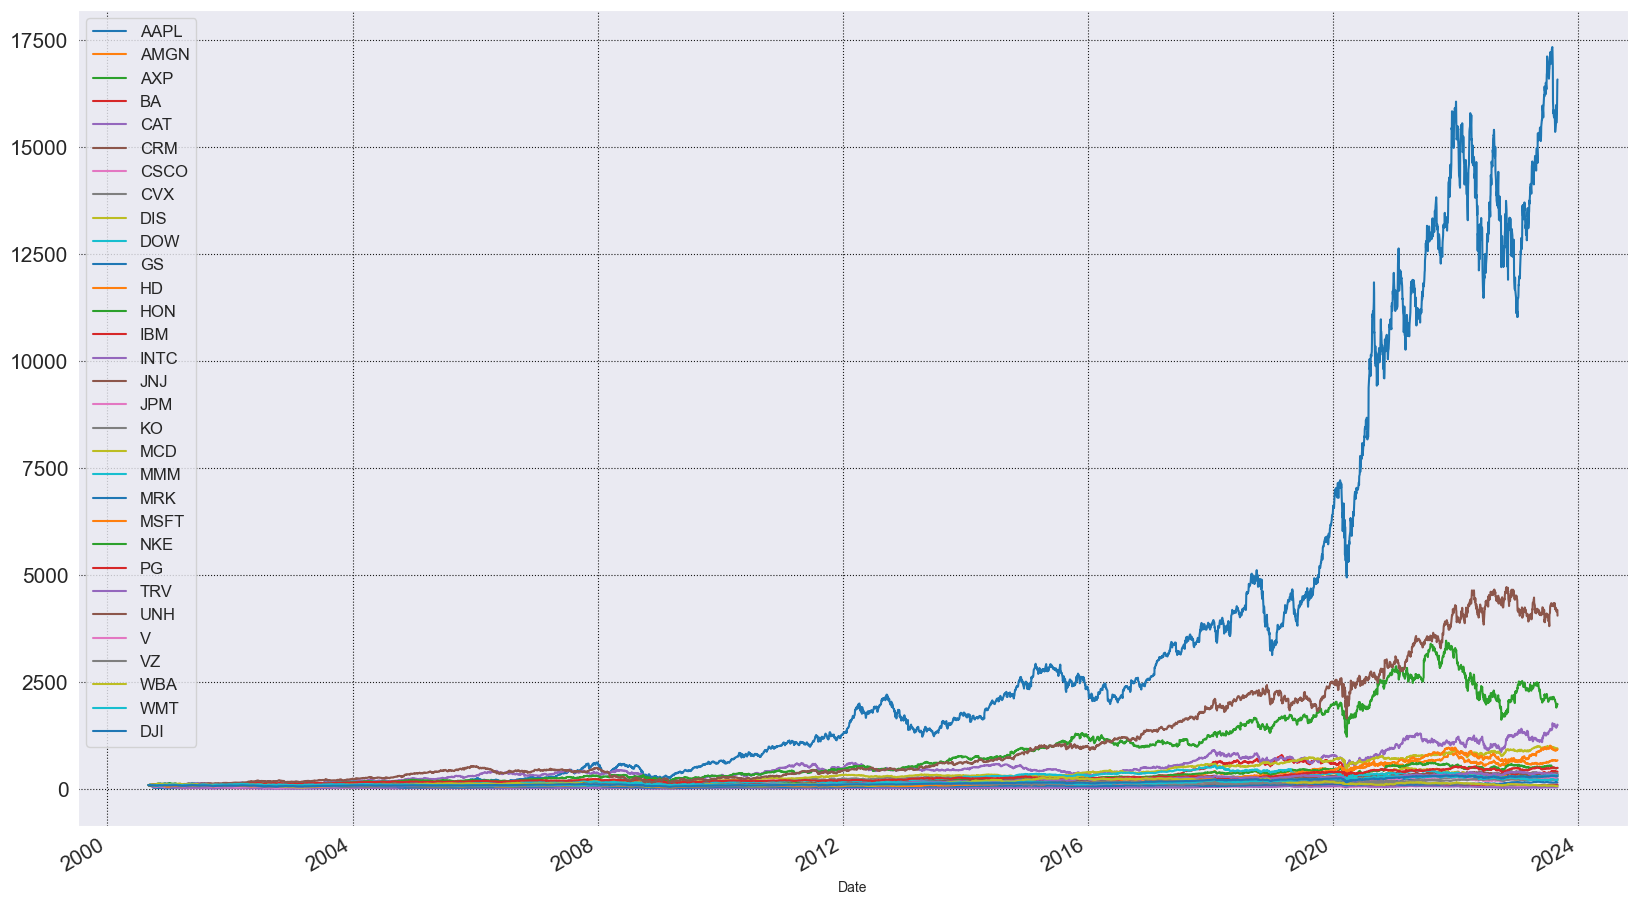

In [12]:
norm.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

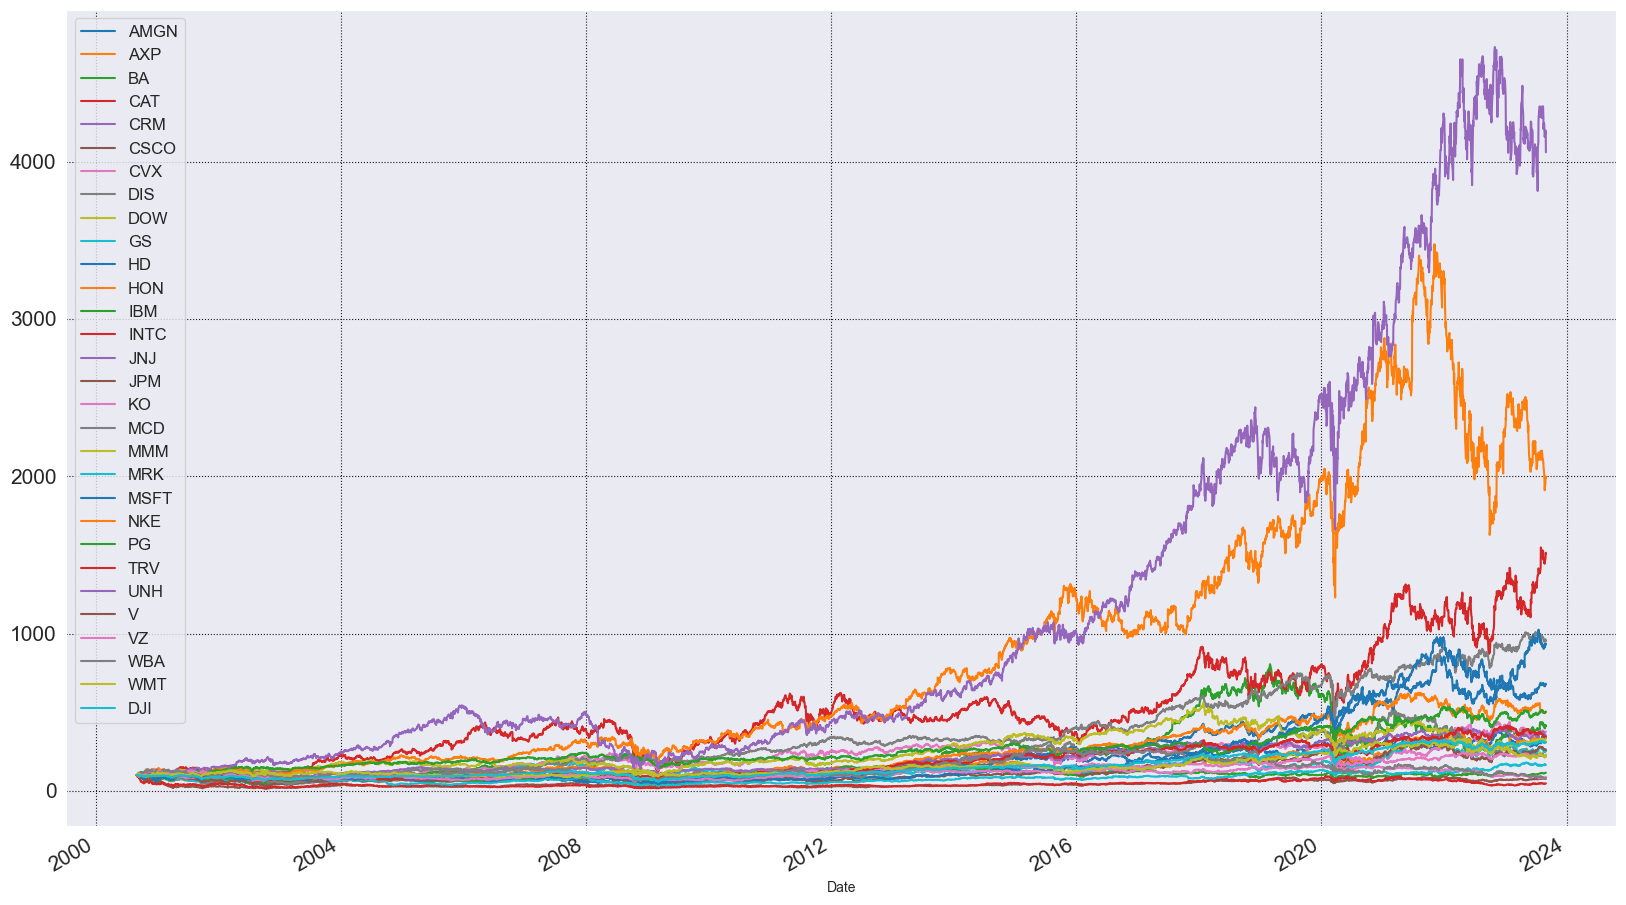

In [13]:
norm.drop(columns =["AAPL"]).plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [14]:
ret = df.pct_change()
ret

AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2000-09-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-09-05 -0.015764 -0.051513  0.022460  0.012557  0.020101       NaN   
2000-09-06 -0.064064 -0.061207  0.004184  0.042841  0.016420       NaN   
2000-09-07  0.060963  0.057851 -0.011458  0.011892 -0.016155       NaN   
2000-09-08 -0.050404  0.040799  0.022129 -0.006410 -0.006568       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-08-25  0.012643 -0.000935  0.003359  0.028071  0.012105  0.019269   
2023-08-28  0.008846  0.000663  0.005495  0.016338  0.008182  0.010741   
2023-08-29  0.021810  0.012045  0.006596  0.000837  0.019069  0.001134   
2023-08-30  0.019172 -0.006779 -0.000437  0.007041  0.008213  0.014531   
2023-08-31  0.001172 -0.005972 -0.013610 -0.021062 -0.004250  0.029855   

                CSCO       CVX       DIS       DOW  ...      MSFT       NKE  \
Date                                                ...                       
2000-09-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-09-05 -0.037375  0.005484 -0.009615       NaN  ... -0.000890  0.019878   
2000-09-06 -0.026515  0.025455  0.035599       NaN  ... -0.009804 -0.040480   
2000-09-07  0.031128  0.002128  0.037500       NaN  ...  0.009001 -0.034375   
2000-09-08 -0.035849 -0.018401 -0.030120       NaN  ... -0.010705  0.012945   
...              ...       ...       ...       ...  ...       ...       ...   
2023-08-25  0.008327  0.007471  0.010792  0.008218  ...  0.009407  0.012394   
2023-08-28  0.008977  0.006850  0.009597  0.011486  ...  0.002229  0.007993   
2023-08-29  0.006406 -0.001560  0.002852  0.011722  ...  0.014550  0.021479   
2023-08-30  0.004420  0.001375 -0.001422 -0.008870  ...  0.001157  0.003243   
2023-08-31  0.009505  0.005744 -0.007119 -0.003470  ... -0.003133 -0.003820   

                  PG       TRV       UNH         V        VZ       WBA  \
Date                                                                     
2000-09-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-09-05  0.018330  0.006676  0.004657       NaN -0.012766  0.014953   
2000-09-06  0.015000  0.025199 -0.019868       NaN -0.020115 -0.011050   
2000-09-07 -0.012808  0.001294 -0.007432       NaN  0.023460  0.001862   
2000-09-08  0.012974  0.019380 -0.014296       NaN  0.015759  0.046468   
...              ...       ...       ...       ...       ...       ...   
2023-08-25  0.006556 -0.001236  0.002090  0.012945 -0.000899 -0.002370   
2023-08-28  0.001563 -0.005011  0.004416  0.005194  0.005997 -0.003563   
2023-08-29  0.000585  0.002798  0.003155  0.006193  0.033979  0.014700   
2023-08-30  0.001105  0.000248 -0.002638  0.003628 -0.001441  0.002349   
2023-08-31  0.001948 -0.000558 -0.030415 -0.002234  0.009815 -0.011328   

                 WMT       DJI  
Date                            
2000-09-01       NaN       NaN  
2000-09-05  0.020513  0.001942  
2000-09-06  0.005025  0.004443  
2000-09-07  0.020000 -0.004489  
2000-09-08  0.022059 -0.003483  
...              ...       ...  
2023-08-25  0.005928  0.007258  
2023-08-28  0.005703  0.006204  
2023-08-29  0.008380  0.008469  
2023-08-30  0.007185  0.001078  
2023-08-31  0.008747 -0.004825  

[5785 rows x 31 columns]

In [15]:
ret.describe()

AAPL         AMGN          AXP           BA          CAT  \
count  5784.000000  5784.000000  5784.000000  5784.000000  5784.000000   
mean      0.001189     0.000378     0.000449     0.000490     0.000672   
std       0.024128     0.018441     0.022621     0.022157     0.020133   
min      -0.518692    -0.134124    -0.175949    -0.238484    -0.145175   
25%      -0.009877    -0.008568    -0.008534    -0.009646    -0.009451   
50%       0.000799     0.000000     0.000278     0.000522     0.000500   
75%       0.012678     0.009154     0.009602     0.010874     0.010851   
max       0.139049     0.151021     0.218823     0.243186     0.147229   

               CRM         CSCO          CVX          DIS          DOW  ...  \
count  4831.000000  5784.000000  5784.000000  5784.000000  1121.000000  ...   
mean      0.001172     0.000230     0.000383     0.000316     0.000389  ...   
std       0.026738     0.022891     0.017529     0.019049     0.024676  ...   
min      -0.271482    -0.162107    -0.221248    -0.183630    -0.216577  ...   
25%      -0.011749    -0.008872    -0.008039    -0.008573    -0.011844  ...   
50%       0.000535     0.000432     0.000752     0.000265     0.000366  ...   
75%       0.013845     0.009857     0.008969     0.008952     0.012557  ...   
max       0.260449     0.243884     0.227407     0.159722     0.209091  ...   

              MSFT          NKE           PG          TRV          UNH  \
count  5784.000000  5784.000000  5784.000000  5784.000000  5784.000000   
mean      0.000563     0.000690     0.000352     0.000373     0.000826   
std       0.018852     0.018582     0.012040     0.017834     0.019354   
min      -0.147390    -0.198127    -0.087373    -0.208004    -0.186362   
25%      -0.008189    -0.008223    -0.005271    -0.007341    -0.008020   
50%       0.000333     0.000498     0.000349     0.000474     0.000747   
75%       0.009268     0.009176     0.006098     0.007975     0.009606   
max       0.195652     0.155314     0.120090     0.255556     0.347550   

                 V           VZ          WBA          WMT          DJI  
count  3890.000000  5784.000000  5784.000000  5784.000000  5784.000000  
mean      0.000909     0.000086     0.000111     0.000305     0.000264  
std       0.018691     0.014659     0.017833     0.013952     0.011774  
min      -0.136435    -0.118462    -0.149873    -0.113758    -0.129265  
25%      -0.007842    -0.007091    -0.008686    -0.006501    -0.004572  
50%       0.001144     0.000176     0.000000     0.000348     0.000485  
75%       0.009250     0.007214     0.009031     0.006840     0.005585  
max       0.149973     0.146324     0.166355     0.117085     0.113650  

[8 rows x 31 columns]

In [16]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [17]:
summary = summary_ann(ret)
summary

Return      Risk
AAPL  0.299540  0.383024
AMGN  0.095366  0.292740
AXP   0.113227  0.359097
BA    0.123375  0.351726
CAT   0.169306  0.319605
CRM   0.295348  0.424451
CSCO  0.058005  0.363386
CVX   0.096608  0.278265
DIS   0.079560  0.302398
DOW   0.098042  0.391723
GS    0.103179  0.355595
HD    0.128305  0.297581
HON   0.113578  0.295184
IBM   0.038632  0.254940
INTC  0.035993  0.368838
JNJ   0.071777  0.185807
JPM   0.112727  0.378802
KO    0.054042  0.197744
MCD   0.123267  0.224163
MMM   0.064241  0.235761
MRK   0.055814  0.259080
MSFT  0.141998  0.299268
NKE   0.173782  0.294973
PG    0.088644  0.191124
TRV   0.093947  0.283098
UNH   0.208278  0.307240
V     0.228975  0.296712
VZ    0.021595  0.232702
WBA   0.028041  0.283089
WMT   0.076963  0.221477
DJI   0.066642  0.186901

In [18]:
summary2 = summary.merge(more_info.loc[:, ["Ticker", "Company"]],
                        how = "left", left_index= True, right_on = "Ticker")
summary2.set_index("Company", inplace = True)
summary2.rename(index = {np.nan : "Dow Jones"}, inplace = True)
summary2

Return      Risk Ticker
Company                                            
Apple                     0.299540  0.383024   AAPL
Amgen                     0.095366  0.292740   AMGN
American Express          0.113227  0.359097    AXP
Boeing                    0.123375  0.351726     BA
Caterpillar               0.169306  0.319605    CAT
Salesforce                0.295348  0.424451    CRM
Cisco                     0.058005  0.363386   CSCO
Chevron                   0.096608  0.278265    CVX
Disney                    0.079560  0.302398    DIS
Dow                       0.098042  0.391723    DOW
Goldman Sachs             0.103179  0.355595     GS
Home Depot                0.128305  0.297581     HD
Honeywell                 0.113578  0.295184    HON
IBM                       0.038632  0.254940    IBM
Intel                     0.035993  0.368838   INTC
Johnson & Johnson         0.071777  0.185807    JNJ
JPMorgan Chase            0.112727  0.378802    JPM
Coca-Cola                 0.054042  0.197744     KO
McDonald's                0.123267  0.224163    MCD
3M                        0.064241  0.235761    MMM
Merck                     0.055814  0.259080    MRK
Microsoft                 0.141998  0.299268   MSFT
Nike                      0.173782  0.294973    NKE
Procter & Gamble          0.088644  0.191124     PG
Travelers                 0.093947  0.283098    TRV
UnitedHealth Group        0.208278  0.307240    UNH
Visa                      0.228975  0.296712      V
Verizon                   0.021595  0.232702     VZ
Walgreens Boots Alliance  0.028041  0.283089    WBA
Walmart                   0.076963  0.221477    WMT
Dow Jones                 0.066642  0.186901    DJI

## Explanatory Data Analysis

In [19]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-09-01 to 2023-08-31
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5784 non-null   float64
 1   AMGN    5784 non-null   float64
 2   AXP     5784 non-null   float64
 3   BA      5784 non-null   float64
 4   CAT     5784 non-null   float64
 5   CRM     4831 non-null   float64
 6   CSCO    5784 non-null   float64
 7   CVX     5784 non-null   float64
 8   DIS     5784 non-null   float64
 9   DOW     1121 non-null   float64
 10  GS      5784 non-null   float64
 11  HD      5784 non-null   float64
 12  HON     5784 non-null   float64
 13  IBM     5784 non-null   float64
 14  INTC    5784 non-null   float64
 15  JNJ     5784 non-null   float64
 16  JPM     5784 non-null   float64
 17  KO      5784 non-null   float64
 18  MCD     5784 non-null   float64
 19  MMM     5784 non-null   float64
 20  MRK     5784 non-null   float64
 21  MSFT    5784 non-nu

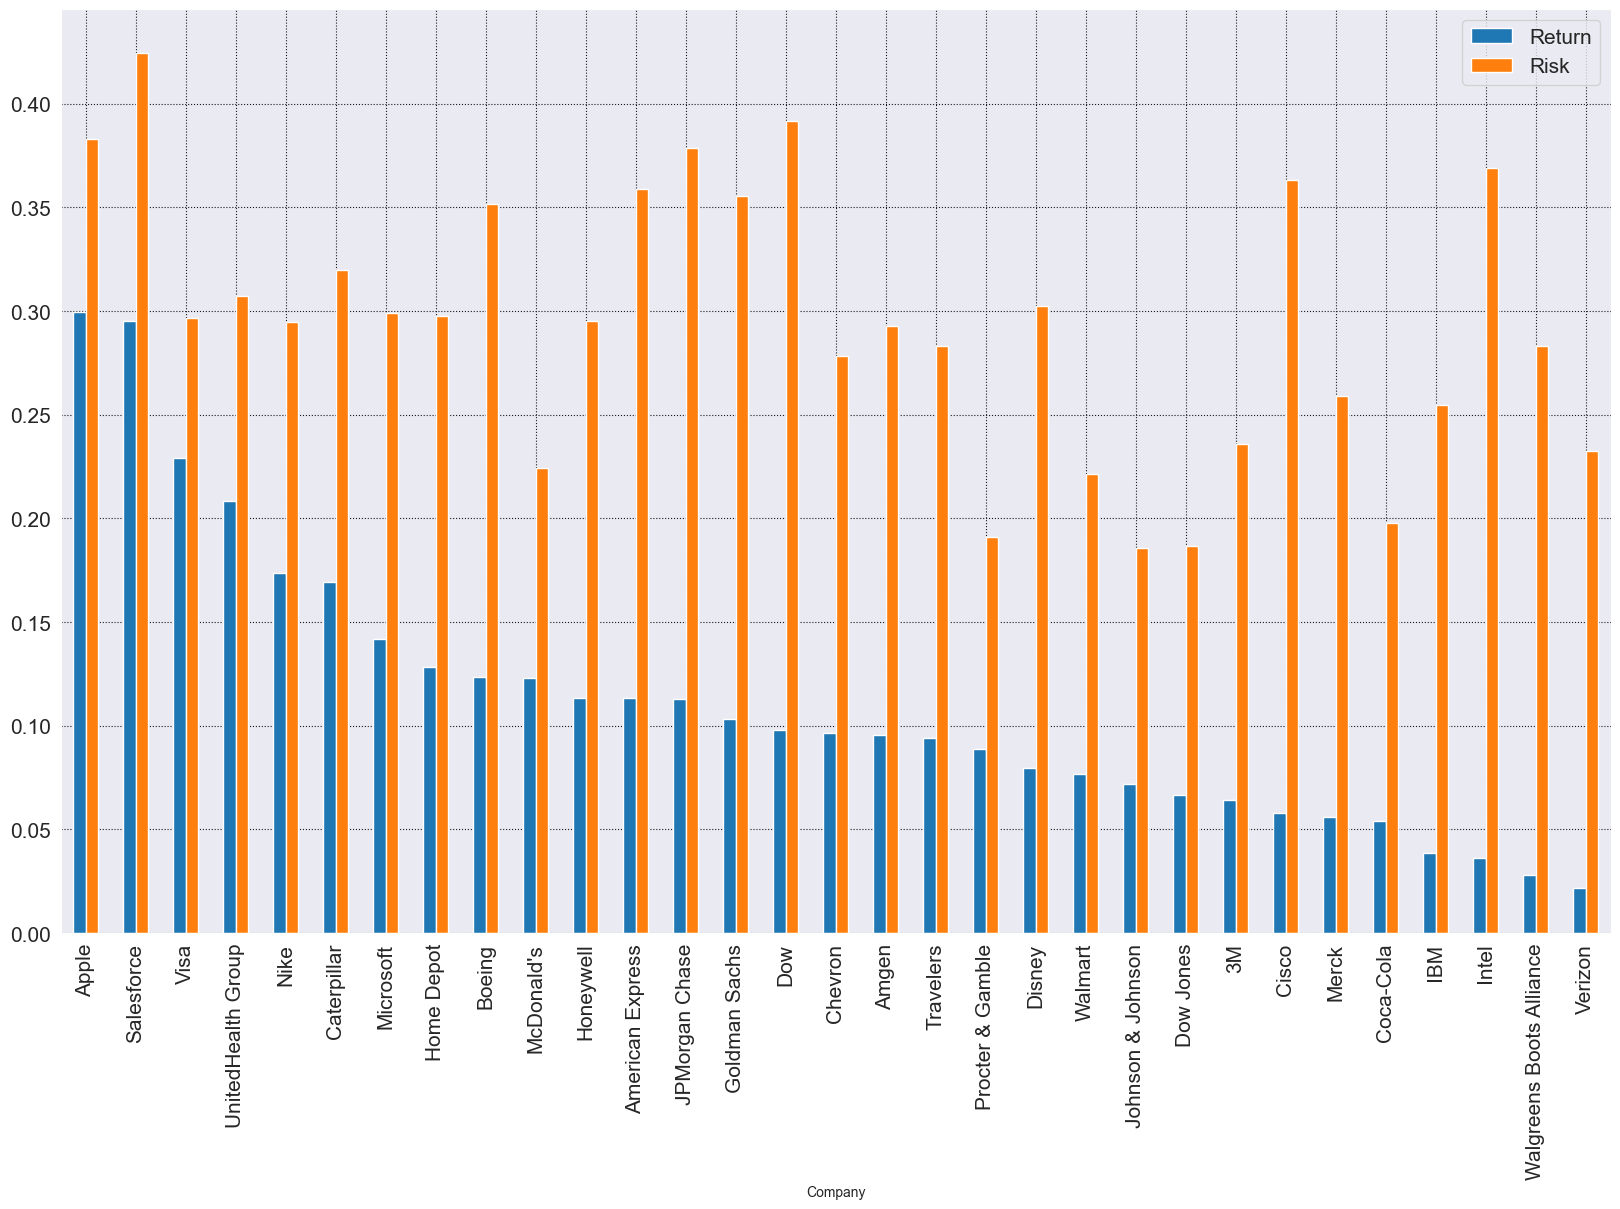

In [20]:
summary2.sort_values(by = "Return", ascending = False).plot(kind = "bar", figsize = (20, 12), 
                                                            fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

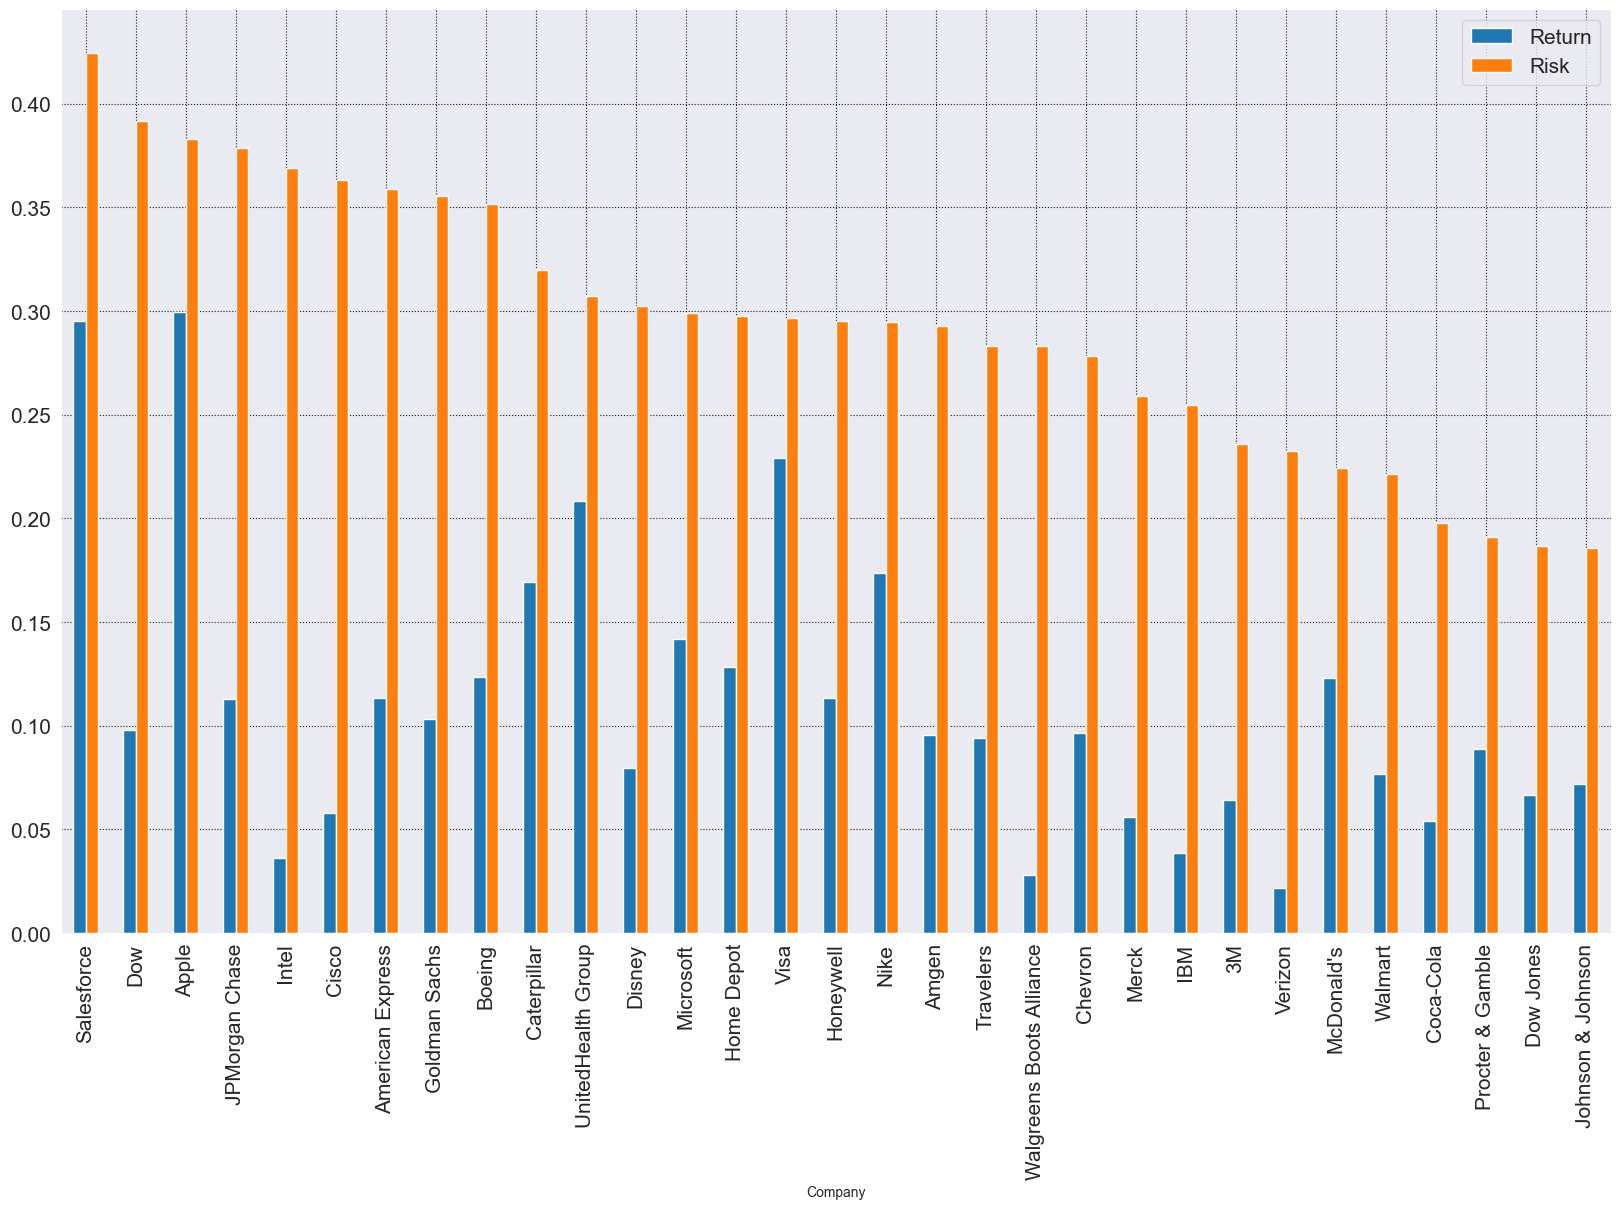

In [21]:
summary2.sort_values(by = "Risk", ascending = False).plot(kind = "bar", figsize = (20, 12), 
                                                          fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [22]:
summary2.set_index("Ticker", inplace = True)
summary2

Return      Risk
Ticker                    
AAPL    0.299540  0.383024
AMGN    0.095366  0.292740
AXP     0.113227  0.359097
BA      0.123375  0.351726
CAT     0.169306  0.319605
CRM     0.295348  0.424451
CSCO    0.058005  0.363386
CVX     0.096608  0.278265
DIS     0.079560  0.302398
DOW     0.098042  0.391723
GS      0.103179  0.355595
HD      0.128305  0.297581
HON     0.113578  0.295184
IBM     0.038632  0.254940
INTC    0.035993  0.368838
JNJ     0.071777  0.185807
JPM     0.112727  0.378802
KO      0.054042  0.197744
MCD     0.123267  0.224163
MMM     0.064241  0.235761
MRK     0.055814  0.259080
MSFT    0.141998  0.299268
NKE     0.173782  0.294973
PG      0.088644  0.191124
TRV     0.093947  0.283098
UNH     0.208278  0.307240
V       0.228975  0.296712
VZ      0.021595  0.232702
WBA     0.028041  0.283089
WMT     0.076963  0.221477
DJI     0.066642  0.186901

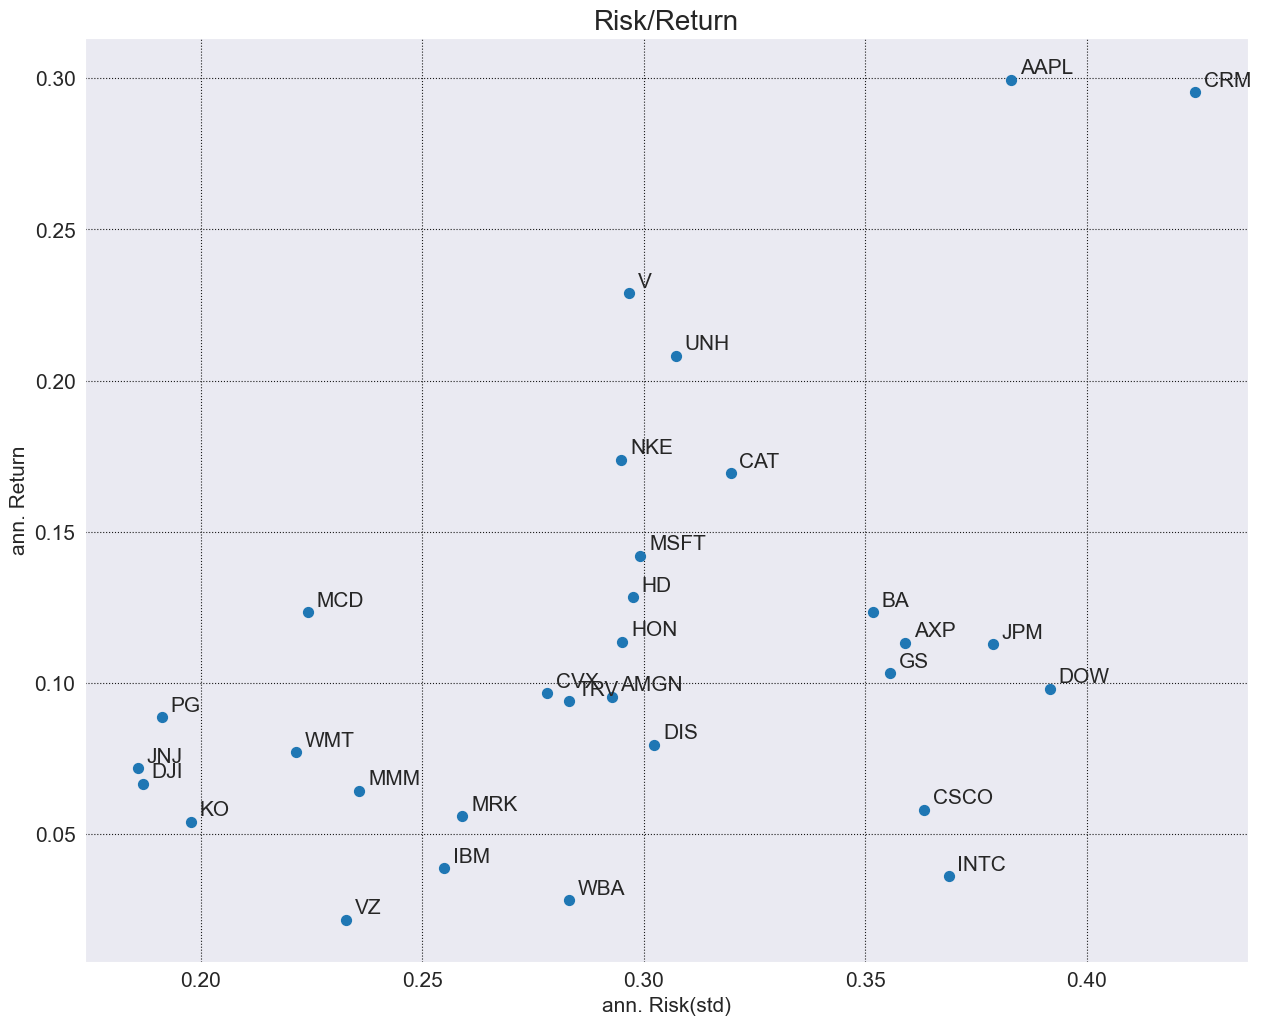

In [23]:
summary2.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15,12), s = 50, fontsize = 15)
for i in summary2.index:
    plt.annotate(i, xy=(summary2.loc[i, "Risk"]+0.002, summary2.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [24]:
corr_matrix = ret.corr()
corr_matrix

AAPL      AMGN       AXP        BA       CAT       CRM      CSCO  \
AAPL  1.000000  0.294379  0.381136  0.316572  0.381744  0.419458  0.462799   
AMGN  0.294379  1.000000  0.341538  0.296942  0.317950  0.290126  0.361170   
AXP   0.381136  0.341538  1.000000  0.528313  0.561630  0.395699  0.461681   
BA    0.316572  0.296942  0.528313  1.000000  0.488051  0.341553  0.354365   
CAT   0.381744  0.317950  0.561630  0.488051  1.000000  0.386433  0.423059   
CRM   0.419458  0.290126  0.395699  0.341553  0.386433  1.000000  0.453069   
CSCO  0.462799  0.361170  0.461681  0.354365  0.423059  0.453069  1.000000   
CVX   0.295797  0.326352  0.509497  0.477177  0.550046  0.336494  0.338595   
DIS   0.377046  0.348821  0.585245  0.490645  0.504525  0.418651  0.461544   
DOW   0.408742  0.356955  0.610712  0.522220  0.706415  0.334404  0.477970   
GS    0.402313  0.340362  0.667844  0.471203  0.549251  0.404150  0.494983   
HD    0.370819  0.348261  0.514631  0.427093  0.455550  0.416981  0.421564   
HON   0.383798  0.358169  0.575280  0.574155  0.604550  0.422179  0.481103   
IBM   0.420724  0.349091  0.483701  0.409104  0.472471  0.383249  0.537390   
INTC  0.493259  0.367380  0.463497  0.387709  0.438144  0.428622  0.597883   
JNJ   0.243021  0.416328  0.383353  0.334341  0.356628  0.283569  0.300094   
JPM   0.372033  0.333643  0.707669  0.460075  0.539957  0.365484  0.467159   
KO    0.261686  0.315940  0.411005  0.372265  0.366363  0.293881  0.298539   
MCD   0.279334  0.277052  0.406486  0.387913  0.345773  0.337963  0.324570   
MMM   0.352875  0.373641  0.535846  0.467249  0.590423  0.360920  0.437695   
MRK   0.221666  0.395818  0.352467  0.282226  0.310806  0.272102  0.267843   
MSFT  0.484206  0.392468  0.483448  0.393472  0.438099  0.482810  0.562653   
NKE   0.344243  0.277017  0.470614  0.405578  0.424259  0.398988  0.379638   
PG    0.246785  0.336871  0.368698  0.311477  0.320581  0.282760  0.293704   
TRV   0.300467  0.340623  0.563090  0.423912  0.454205  0.328990  0.376020   
UNH   0.265099  0.335120  0.402809  0.340363  0.346921  0.281683  0.256063   
V     0.506466  0.377961  0.614760  0.457015  0.487378  0.483289  0.506201   
VZ    0.267316  0.310172  0.409934  0.302869  0.352261  0.310589  0.365707   
WBA   0.250765  0.316454  0.379708  0.365470  0.375089  0.274004  0.282788   
WMT   0.283004  0.320109  0.346864  0.290781  0.323197  0.261081  0.345041   
DJI   0.529618  0.509638  0.759831  0.680456  0.725331  0.535106  0.612957   

           CVX       DIS       DOW  ...      MSFT       NKE        PG  \
AAPL  0.295797  0.377046  0.408742  ...  0.484206  0.344243  0.246785   
AMGN  0.326352  0.348821  0.356955  ...  0.392468  0.277017  0.336871   
AXP   0.509497  0.585245  0.610712  ...  0.483448  0.470614  0.368698   
BA    0.477177  0.490645  0.522220  ...  0.393472  0.405578  0.311477   
CAT   0.550046  0.504525  0.706415  ...  0.438099  0.424259  0.320581   
CRM   0.336494  0.418651  0.334404  ...  0.482810  0.398988  0.282760   
CSCO  0.338595  0.461544  0.477970  ...  0.562653  0.379638  0.293704   
CVX   1.000000  0.464058  0.586357  ...  0.398390  0.367983  0.361449   
DIS   0.464058  1.000000  0.502989  ...  0.481747  0.458493  0.355283   
DOW   0.586357  0.502989  1.000000  ...  0.394618  0.470872  0.334494   
GS    0.484452  0.544026  0.647052  ...  0.484934  0.422295  0.309379   
HD    0.380380  0.499279  0.461264  ...  0.462029  0.471588  0.363554   
HON   0.507478  0.570890  0.615040  ...  0.496972  0.440755  0.364283   
IBM   0.425722  0.466161  0.566290  ...  0.513120  0.392275  0.347745   
INTC  0.358294  0.447355  0.429773  ...  0.607174  0.371457  0.300108   
JNJ   0.411663  0.370233  0.338607  ...  0.361100  0.327020  0.508964   
JPM   0.477801  0.530970  0.659295  ...  0.464657  0.432183  0.335702   
KO    0.404627  0.396068  0.479704  ...  0.375703  0.367685  0.538223   
MCD   0.380335  0.394927  0.424138  ...  0.354000  0.371106  0.377032   
MMM   0.487717  0.502878  0.566258  ...  0.437565  0.

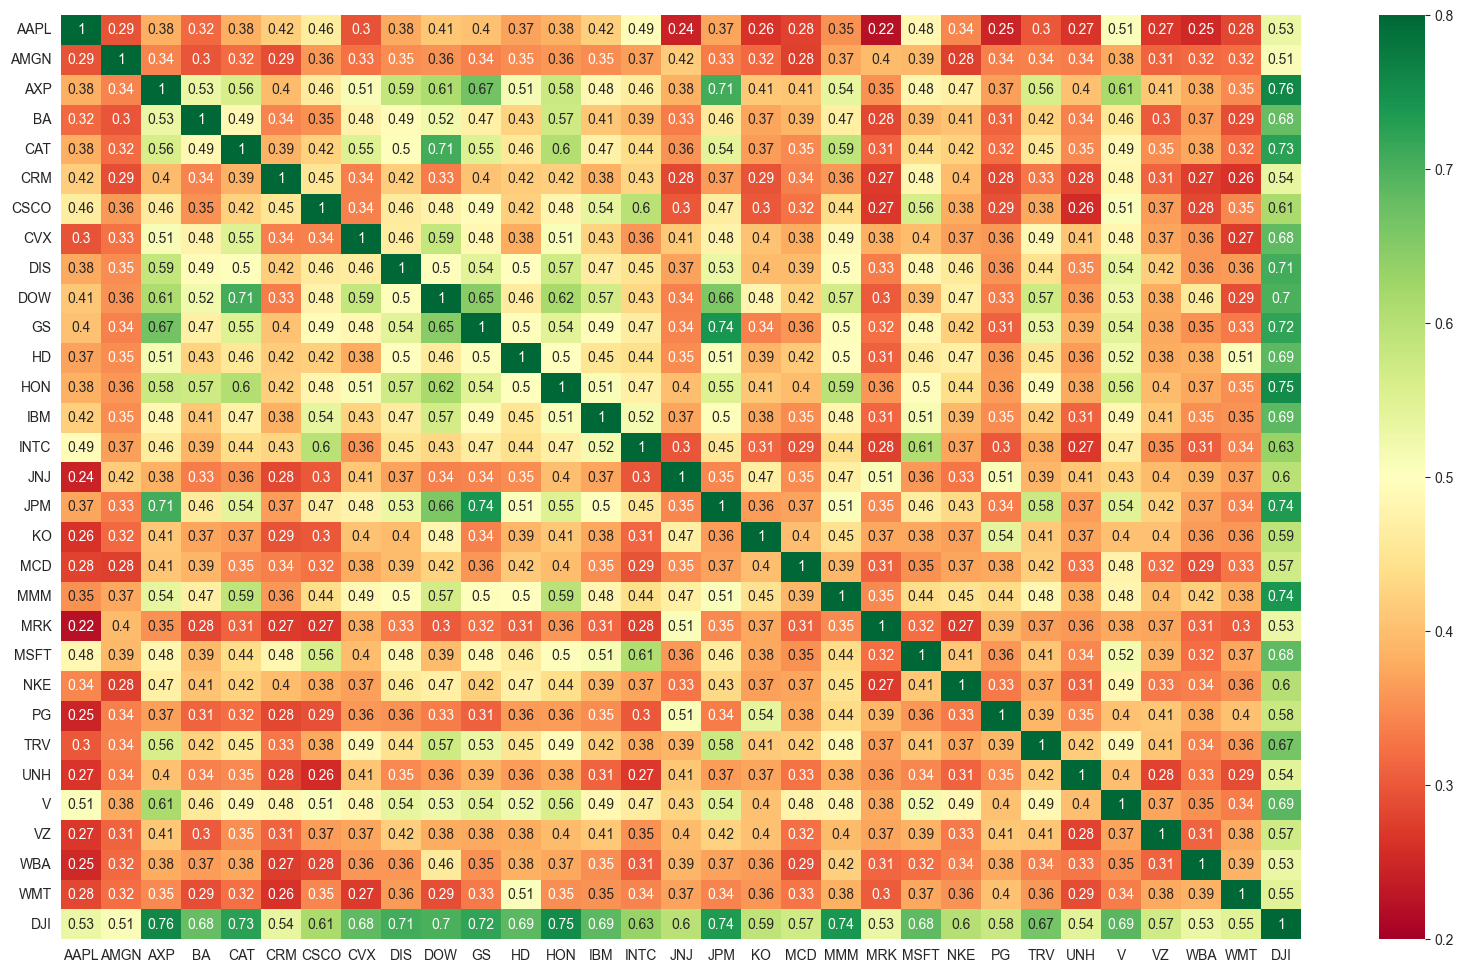

In [25]:
import seaborn as sns
plt.figure(figsize = (20, 12))
sns.heatmap(corr_matrix, cmap='RdYlGn',annot=True, vmin = 0.2, vmax = 0.8)
plt.show()

## Index Tracking - an Introduction

Attempting to track the DJI with only a 10 Stocks Portfolio

Criteria to select Tracking Portfolio: Those 10 Stocks with the lowest individual Tracking Error (TE) in the Training/Fitting Period.

- Training/Fitting Period: 2010 & 2019
- (Forward) Testing Period: 2020 & 2021

Once we have identified the 10 Tracking Stocks we need to find their optimal weights in the Tracking Portfolio that minimize TE.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-09-01 to 2023-08-31
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5785 non-null   float64
 1   AMGN    5785 non-null   float64
 2   AXP     5785 non-null   float64
 3   BA      5785 non-null   float64
 4   CAT     5785 non-null   float64
 5   CRM     4832 non-null   float64
 6   CSCO    5785 non-null   float64
 7   CVX     5785 non-null   float64
 8   DIS     5785 non-null   float64
 9   DOW     1122 non-null   float64
 10  GS      5785 non-null   float64
 11  HD      5785 non-null   float64
 12  HON     5785 non-null   float64
 13  IBM     5785 non-null   float64
 14  INTC    5785 non-null   float64
 15  JNJ     5785 non-null   float64
 16  JPM     5785 non-null   float64
 17  KO      5785 non-null   float64
 18  MCD     5785 non-null   float64
 19  MMM     5785 non-null   float64
 20  MRK     5785 non-null   float64
 21  MSFT    5785 non-nu

In [27]:
df2 = df.loc["2010":"2019"].copy()
df2

AAPL        AMGN         AXP          BA         CAT  \
Date                                                                    
2010-01-04   7.643214   57.720001   40.919998   56.180000   58.549999   
2010-01-05   7.656429   57.220001   40.830002   58.020000   59.250000   
2010-01-06   7.534643   56.790001   41.490002   59.779999   59.430000   
2010-01-07   7.520714   56.270000   41.980000   62.200001   59.669998   
2010-01-08   7.570714   56.770000   41.950001   61.599998   60.340000   
...               ...         ...         ...         ...         ...   
2019-12-24  71.067497  242.330002  124.739998  333.000000  147.479996   
2019-12-26  72.477501  241.899994  125.410004  329.920013  148.220001   
2019-12-27  72.449997  241.529999  125.190002  330.140015  148.279999   
2019-12-30  72.879997  240.270004  124.300003  326.399994  147.520004   
2019-12-31  73.412498  241.070007  124.489998  325.760010  147.679993   

                   CRM       CSCO         CVX         DIS        DOW  ...  \
Date                                                                  ...   
2010-01-04   18.705000  24.690001   79.059998   32.070000        NaN  ...   
2010-01-05   18.625000  24.580000   79.620003   31.990000        NaN  ...   
2010-01-06   18.592501  24.420000   79.629997   31.820000        NaN  ...   
2010-01-07   18.510000  24.530001   79.330002   31.830000        NaN  ...   
2010-01-08   18.537500  24.660000   79.470001   31.879999        NaN  ...   
...                ...        ...         ...         ...        ...  ...   
2019-12-24  163.250000  47.779999  120.339996  145.289993  54.900002  ...   
2019-12-26  164.509995  47.849998  120.599998  145.699997  55.220001  ...   
2019-12-27  164.979996  47.770000  120.300003  145.750000  54.830002  ...   
2019-12-30  162.440002  47.590000  119.849998  143.770004  54.340000  ...   
2019-12-31  162.639999  47.959999  120.510002  144.630005  54.730000  ...   

                  MSFT         NKE          PG         TRV         UNH  \
Date                                                                     
2010-01-04   30.950001   16.337500   61.119999   49.810001   31.530001   
2010-01-05   30.959999   16.402500   61.139999   48.630001   31.480000   
2010-01-06   30.770000   16.302500   60.849998   47.939999   31.790001   
2010-01-07   30.450001   16.462500   60.520000   48.630001   33.009998   
2010-01-08   30.660000   16.430000   60.439999   48.560001   32.700001   
...                ...         ...         ...         ...         ...   
2019-12-24  157.380005  100.139999  125.220001  135.830002  294.540009   
2019-12-26  158.669998  100.709999  125.220001  136.289993  295.649994   
2019-12-27  158.960007  101.570000  126.089996  136.800003  295.970001   
2019-12-30  157.589996  100.800003  124.470001  136.490005  293.850006   
2019-12-31  157.699997  101.309998  124.900002  136.949997  293.980011   

                     V         VZ        WBA         WMT           DJI  
Date                                                                    
2010-01-04   22.035000  31.212946  37.299999   54.230000  10583.959961  
2010-01-05   21.782499  31.269218  37.000000   53.689999  10572.019531  
2010-01-06   21.490000  29.937416  36.720001   53.570000  10573.679688  
2010-01-07   21.690001  29.759218  36.939999   53.599998  10606.860352  
2010-01-08   21.750000  29.777975  36.990002   53.330002  10618.190430  
...                ...        ...        ...         ...           ...  
2019-12-24  187.570007  61.279999  58.349998  119.510002  28515.449219  
2019-12-26  189.160004  61.290001  58.900002  119.519997  28621.390625  
2019-12-27  189.389999  61.529999  59.020000  119.589996  28645.259766  
2019-12-30  187.830002  61.209999  58.910000  119.400002  28462.140625  
2019-12-31  187.899994  61.400002  58.959999  118.839996  28538.439453  

[2516 rows x 31 columns]

In [28]:
norm2 = df2.div(df2.iloc[0]).mul(100)
norm2

AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05  100.172893   99.133749   99.780068  103.275187  101.195561   
2010-01-06   98.579511   98.388773  101.392971  106.407972  101.502991   
2010-01-07   98.397266   97.487871  102.590424  110.715558  101.912893   
2010-01-08   99.051443   98.354122  102.517113  109.647558  103.057218   
...                ...         ...         ...         ...         ...   
2019-12-24  929.811662  419.837139  304.838718  592.737626  251.887272   
2019-12-26  948.259447  419.092150  306.476073  587.255272  253.151158   
2019-12-27  947.899598  418.451132  305.938436  587.646872  253.253631   
2019-12-30  953.525508  416.268190  303.763462  580.989662  251.955604   
2019-12-31  960.492488  417.654197  304.227770  579.850495  252.228855   

                   CRM        CSCO         CVX         DIS  DOW  ...  \
Date                                                             ...   
2010-01-04  100.000000  100.000000  100.000000  100.000000  NaN  ...   
2010-01-05   99.572307   99.554473  100.708329   99.750546  NaN  ...   
2010-01-06   99.398561   98.906438  100.720971   99.220455  NaN  ...   
2010-01-07   98.957500   99.351965  100.341518   99.251638  NaN  ...   
2010-01-08   99.104520   99.878491  100.518598   99.407544  NaN  ...   
...                ...         ...         ...         ...  ...  ...   
2019-12-24  872.761297  193.519634  152.213509  453.040208  NaN  ...   
2019-12-26  879.497435  193.803149  152.542376  454.318673  NaN  ...   
2019-12-27  882.010138  193.479139  152.162923  454.474591  NaN  ...   
2019-12-30  868.430917  192.750098  151.593729  448.300610  NaN  ...   
2019-12-31  869.500134  194.248676  152.428543  450.982246  NaN  ...   

                  MSFT         NKE          PG         TRV         UNH  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05  100.032305  100.397861  100.032723   97.630997   99.841417   
2010-01-06   99.418416   99.785770   99.558245   96.245728  100.824612   
2010-01-07   98.384491  100.765111   99.018327   97.630997  104.693935   
2010-01-08   99.063002  100.566186   98.887434   97.490464  103.710752   
...                ...         ...         ...         ...         ...   
2019-12-24  508.497580  612.945688  204.875660  272.696242  934.157952   
2019-12-26  512.665571  616.434592  204.875660  273.619734  937.678362   
2019-12-27  513.602594  621.698559  206.299081  274.643644  938.693291   
2019-12-30  509.176066  616.985496  203.648566  274.021284  931.969552   
2019-12-31  509.531480  620.107115  204.352100  274.944776  932.381873   

                     V          VZ         WBA         WMT         DJI  
Date                                                                    
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000  
2010-01-05   98.854093  100.180286   99.195712   99.004239   99.887184  
2010-01-06   97.526662   95.913459   98.445046   98.782962   99.902869  
2010-01-07   98.434312   95.342549   99.034851   98.838279  100.216369  
2010-01-08   98.706604   95.402642   99.168907   98.340406  100.323418  
...                ...         ...         ...         ...         ...  
2019-12-24  851.236708  196.328789  156.434315  220.376181  269.421363  
2019-12-26  858.452485  196.360834  157.908855  220.394611  270.422325  
2019-12-27  859.496259  197.129739  158.230567  220.523690  270.647847  
2019-12-30  852.416624  196.104524  157.935660  220.173340  268.917690  
2019-12-31  852.734265  196.713254  158.069706  219.140692  269.638581  

[2516 rows x 31 columns]

In [29]:
ret2 = ret.loc["2010":"2019"].copy()
ret2

AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2010-01-04  0.015565  0.020329  0.009872  0.037872  0.027373  0.014233   
2010-01-05  0.001729 -0.008663 -0.002199  0.032752  0.011956 -0.004277   
2010-01-06 -0.015906 -0.007515  0.016165  0.030334  0.003038 -0.001745   
2010-01-07 -0.001849 -0.009157  0.011810  0.040482  0.004038 -0.004437   
2010-01-08  0.006648  0.008886 -0.000715 -0.009646  0.011228  0.001486   
...              ...       ...       ...       ...       ...       ...   
2019-12-24  0.000951 -0.002880  0.002008 -0.013479 -0.006869 -0.002993   
2019-12-26  0.019840 -0.001774  0.005371 -0.009249  0.005018  0.007718   
2019-12-27 -0.000379 -0.001530 -0.001754  0.000667  0.000405  0.002857   
2019-12-30  0.005935 -0.005217 -0.007109 -0.011329 -0.005125 -0.015396   
2019-12-31  0.007307  0.003330  0.001529 -0.001961  0.001085  0.001231   

                CSCO       CVX       DIS       DOW  ...      MSFT       NKE  \
Date                                                ...                       
2010-01-04  0.031328  0.026887 -0.005581       NaN  ...  0.015420 -0.010898   
2010-01-05 -0.004455  0.007083 -0.002495       NaN  ...  0.000323  0.003979   
2010-01-06 -0.006509  0.000126 -0.005314       NaN  ... -0.006137 -0.006097   
2010-01-07  0.004505 -0.003767  0.000314       NaN  ... -0.010400  0.009814   
2010-01-08  0.005300  0.001765  0.001571       NaN  ...  0.006897 -0.001974   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-24 -0.006653  0.000083  0.004216 -0.000546  ... -0.000191  0.001000   
2019-12-26  0.001465  0.002161  0.002822  0.005829  ...  0.008197  0.005692   
2019-12-27 -0.001672 -0.002488  0.000343 -0.007063  ...  0.001828  0.008539   
2019-12-30 -0.003768 -0.003741 -0.013585 -0.008937  ... -0.008619 -0.007581   
2019-12-31  0.007775  0.005507  0.005982  0.007177  ...  0.000698  0.005059   

                  PG       TRV       UNH         V        VZ       WBA  \
Date                                                                     
2010-01-04  0.008082 -0.001003  0.034449  0.007775  0.004528  0.015795   
2010-01-05  0.000327 -0.023690 -0.001586 -0.011459  0.001803 -0.008043   
2010-01-06 -0.004743 -0.014189  0.009848 -0.013428 -0.042591 -0.007568   
2010-01-07 -0.005423  0.014393  0.038377  0.009307 -0.005952  0.005991   
2010-01-08 -0.001322 -0.001439 -0.009391  0.002766  0.000630  0.001354   
...              ...       ...       ...       ...       ...       ...   
2019-12-24  0.002562 -0.002936 -0.001864  0.002619 -0.001954 -0.003756   
2019-12-26  0.000000  0.003387  0.003769  0.008477  0.000163  0.009426   
2019-12-27  0.006948  0.003742  0.001082  0.001216  0.003916  0.002037   
2019-12-30 -0.012848 -0.002266 -0.007163 -0.008237 -0.005201 -0.001864   
2019-12-31  0.003455  0.003370  0.000442  0.000373  0.003104  0.000849   

                 WMT       DJI  
Date                            
2010-01-04  0.014593  0.014951  
2010-01-05 -0.009958 -0.001128  
2010-01-06 -0.002235  0.000157  
2010-01-07  0.000560  0.003138  
2010-01-08 -0.005037  0.001068  
...              ...       ...  
2019-12-24  0.004033 -0.001264  
2019-12-26  0.000084  0.003715  
2019-12-27  0.000586  0.000834  
2019-12-30 -0.001589 -0.006393  
2019-12-31 -0.004690  0.002681  

[2516 rows x 31 columns]

In [30]:
ret_diff = ret2.sub(ret2.DJI, axis = 0)
ret_diff

AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2010-01-04  0.000614  0.005378 -0.005079  0.022921  0.012422 -0.000718   
2010-01-05  0.002857 -0.007534 -0.001071  0.033880  0.013084 -0.003149   
2010-01-06 -0.016063 -0.007672  0.016008  0.030177  0.002881 -0.001902   
2010-01-07 -0.004987 -0.012295  0.008672  0.037344  0.000900 -0.007575   
2010-01-08  0.005580  0.007818 -0.001783 -0.010715  0.010160  0.000418   
...              ...       ...       ...       ...       ...       ...   
2019-12-24  0.002214 -0.001617  0.003272 -0.012216 -0.005605 -0.001729   
2019-12-26  0.016125 -0.005490  0.001656 -0.012964  0.001302  0.004003   
2019-12-27 -0.001213 -0.002363 -0.002588 -0.000167 -0.000429  0.002023   
2019-12-30  0.012328  0.001176 -0.000717 -0.004936  0.001267 -0.009003   
2019-12-31  0.004626  0.000649 -0.001152 -0.004641 -0.001596 -0.001450   

                CSCO       CVX       DIS       DOW  ...      MSFT       NKE  \
Date                                                ...                       
2010-01-04  0.016377  0.011936 -0.020532       NaN  ...  0.000469 -0.025849   
2010-01-05 -0.003327  0.008211 -0.001366       NaN  ...  0.001451  0.005107   
2010-01-06 -0.006666 -0.000032 -0.005471       NaN  ... -0.006294 -0.006254   
2010-01-07  0.001366 -0.006905 -0.002824       NaN  ... -0.013538  0.006676   
2010-01-08  0.004231  0.000697  0.000503       NaN  ...  0.005828 -0.003042   
...              ...       ...       ...       ...  ...       ...       ...   
2019-12-24 -0.005389  0.001347  0.005480  0.000718  ...  0.001073  0.002263   
2019-12-26 -0.002250 -0.001555 -0.000893  0.002114  ...  0.004481  0.001977   
2019-12-27 -0.002506 -0.003321 -0.000491 -0.007897  ...  0.000994  0.007705   
2019-12-30  0.002625  0.002652 -0.007192 -0.002544  ... -0.002226 -0.001188   
2019-12-31  0.005094  0.002826  0.003301  0.004496  ... -0.001983  0.002379   

                  PG       TRV       UNH         V        VZ       WBA  \
Date                                                                     
2010-01-04 -0.006869 -0.015954  0.019498 -0.007176 -0.010423  0.000844   
2010-01-05  0.001455 -0.022562 -0.000458 -0.010331  0.002931 -0.006915   
2010-01-06 -0.004900 -0.014346  0.009691 -0.013585 -0.042749 -0.007725   
2010-01-07 -0.008561  0.011255  0.035239  0.006169 -0.009090  0.002853   
2010-01-08 -0.002390 -0.002508 -0.010459  0.001698 -0.000438  0.000285   
...              ...       ...       ...       ...       ...       ...   
2019-12-24  0.003826 -0.001672 -0.000600  0.003883 -0.000691 -0.002493   
2019-12-26 -0.003715 -0.000329  0.000053  0.004762 -0.003552  0.005711   
2019-12-27  0.006114  0.002908  0.000248  0.000382  0.003082  0.001203   
2019-12-30 -0.006455  0.004127 -0.000770 -0.001844  0.001192  0.004529   
2019-12-31  0.000774  0.000689 -0.002238 -0.002308  0.000423 -0.001832   

                 WMT  DJI  
Date                       
2010-01-04 -0.000358  0.0  
2010-01-05 -0.008829  0.0  
2010-01-06 -0.002392  0.0  
2010-01-07 -0.002578  0.0  
2010-01-08 -0.006105  0.0  
...              ...  ...  
2019-12-24  0.005296  0.0  
2019-12-26 -0.003632  0.0  
2019-12-27 -0.000248  0.0  
2019-12-30  0.004804  0.0  
2019-12-31 -0.007371  0.0  

[2516 rows x 31 columns]

In [31]:
ret_diff.agg(["mean", "std"]).T

mean       std
AAPL  0.000598  0.013497
AMGN  0.000243  0.012135
AXP   0.000109  0.010012
BA    0.000397  0.011172
CAT   0.000086  0.012046
CRM   0.000656  0.018360
CSCO -0.000037  0.012339
CVX  -0.000173  0.009406
DIS   0.000245  0.009615
DOW   0.000146  0.017736
GS   -0.000181  0.011887
HD    0.000442  0.009219
HON   0.000261  0.007605
IBM  -0.000353  0.009022
INTC  0.000108  0.012002
JNJ  -0.000069  0.007804
JPM   0.000165  0.010787
KO   -0.000132  0.008450
MCD   0.000067  0.008912
MMM  -0.000063  0.007665
MRK  -0.000003  0.010050
MSFT  0.000317  0.010612
NKE   0.000392  0.012167
PG   -0.000108  0.008750
TRV   0.000025  0.008163
UNH   0.000565  0.011695
V     0.000524  0.011313
VZ   -0.000112  0.009840
WBA  -0.000125  0.013897
WMT  -0.000063  0.010218
DJI   0.000000  0.000000

## Selecting the Tracking Stocks

In [32]:
def tracking_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Premium"] = summary["mean"] * 252
    summary["TE"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [33]:
tracking = tracking_ann(ret_diff)
tracking

Premium        TE
AAPL  0.150726  0.214265
AMGN  0.061138  0.192636
AXP   0.027547  0.158936
BA    0.100160  0.177347
CAT   0.021685  0.191220
CRM   0.165370  0.291451
CSCO -0.009290  0.195880
CVX  -0.043519  0.149309
DIS   0.061788  0.152628
DOW   0.036697  0.281547
GS   -0.045714  0.188699
HD    0.111407  0.146347
HON   0.065848  0.120729
IBM  -0.088989  0.143213
INTC  0.027224  0.190528
JNJ  -0.017468  0.123881
JPM   0.041621  0.171239
KO   -0.033187  0.134132
MCD   0.016904  0.141478
MMM  -0.015875  0.121684
MRK  -0.000835  0.159545
MSFT  0.079783  0.168461
NKE   0.098894  0.193152
PG   -0.027212  0.138906
TRV   0.006307  0.129589
UNH   0.142398  0.185651
V     0.132147  0.179584
VZ   -0.028101  0.156202
WBA  -0.031415  0.220606
WMT  -0.015769  0.162213
DJI   0.000000  0.000000

In [34]:
tracking.sort_values(by = "TE")

Premium        TE
DJI   0.000000  0.000000
HON   0.065848  0.120729
MMM  -0.015875  0.121684
JNJ  -0.017468  0.123881
TRV   0.006307  0.129589
KO   -0.033187  0.134132
PG   -0.027212  0.138906
MCD   0.016904  0.141478
IBM  -0.088989  0.143213
HD    0.111407  0.146347
CVX  -0.043519  0.149309
DIS   0.061788  0.152628
VZ   -0.028101  0.156202
AXP   0.027547  0.158936
MRK  -0.000835  0.159545
WMT  -0.015769  0.162213
MSFT  0.079783  0.168461
JPM   0.041621  0.171239
BA    0.100160  0.177347
V     0.132147  0.179584
UNH   0.142398  0.185651
GS   -0.045714  0.188699
INTC  0.027224  0.190528
CAT   0.021685  0.191220
AMGN  0.061138  0.192636
NKE   0.098894  0.193152
CSCO -0.009290  0.195880
AAPL  0.150726  0.214265
WBA  -0.031415  0.220606
DOW   0.036697  0.281547
CRM   0.165370  0.291451

In [35]:
noa = 10

In [36]:
tracking_stocks = tracking.sort_values(by = "TE").index[:noa+1]

In [37]:
tracking_stocks

Index(['DJI', 'HON', 'MMM', 'JNJ', 'TRV', 'KO', 'PG', 'MCD', 'IBM', 'HD',
       'CVX'],
      dtype='object')

In [38]:
norm_track = norm2.loc[:, tracking_stocks]
norm_track

DJI         HON         MMM         JNJ         TRV  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05   99.887184  100.198269   99.373649   98.840445   97.630997   
2010-01-06   99.902869  100.198269  100.782946   99.644398   96.245728   
2010-01-07  100.216369  102.131348  100.855224   98.933212   97.630997   
2010-01-08  100.323418  104.386621  101.565891   99.273344   97.490464   
...                ...         ...         ...         ...         ...   
2019-12-24  269.421363  458.323513  212.816189  225.618417  272.696242   
2019-12-26  270.422325  459.805265  212.707785  225.463824  273.619734   
2019-12-27  270.647847  458.765428  213.514818  225.340135  274.643644   
2019-12-30  268.917690  458.609463  211.792350  224.644407  274.021284   
2019-12-31  269.638581  460.117196  212.503018  225.525656  274.944776   

                    KO          PG         MCD         IBM          HD  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05   98.790318  100.032723   99.235426   98.792000  100.732470   
2010-01-06   98.755261   99.558245   97.881494   98.150247  100.383678   
2010-01-07   98.509814   99.018327   98.598284   97.810499  101.569588   
2010-01-08   96.686537   98.887434   98.502710   98.792000  101.081268   
...                ...         ...         ...         ...         ...   
2019-12-24  191.830288  204.875660  313.268560  101.910156  769.689563   
2019-12-26  192.917250  204.875660  313.889776  101.857303  770.212789   
2019-12-27  194.074325  206.299081  315.657856  102.129111  767.247997   
2019-12-30  193.793827  203.648566  313.650856  100.271802  757.969993   
2019-12-31  194.074325  204.352100  314.765856  101.200450  761.702143   

                   CVX  
Date                    
2010-01-04  100.000000  
2010-01-05  100.708329  
2010-01-06  100.720971  
2010-01-07  100.341518  
2010-01-08  100.518598  
...                ...  
2019-12-24  152.213509  
2019-12-26  152.542376  
2019-12-27  152.162923  
2019-12-30  151.593729  
2019-12-31  152.428543  

[2516 rows x 11 columns]

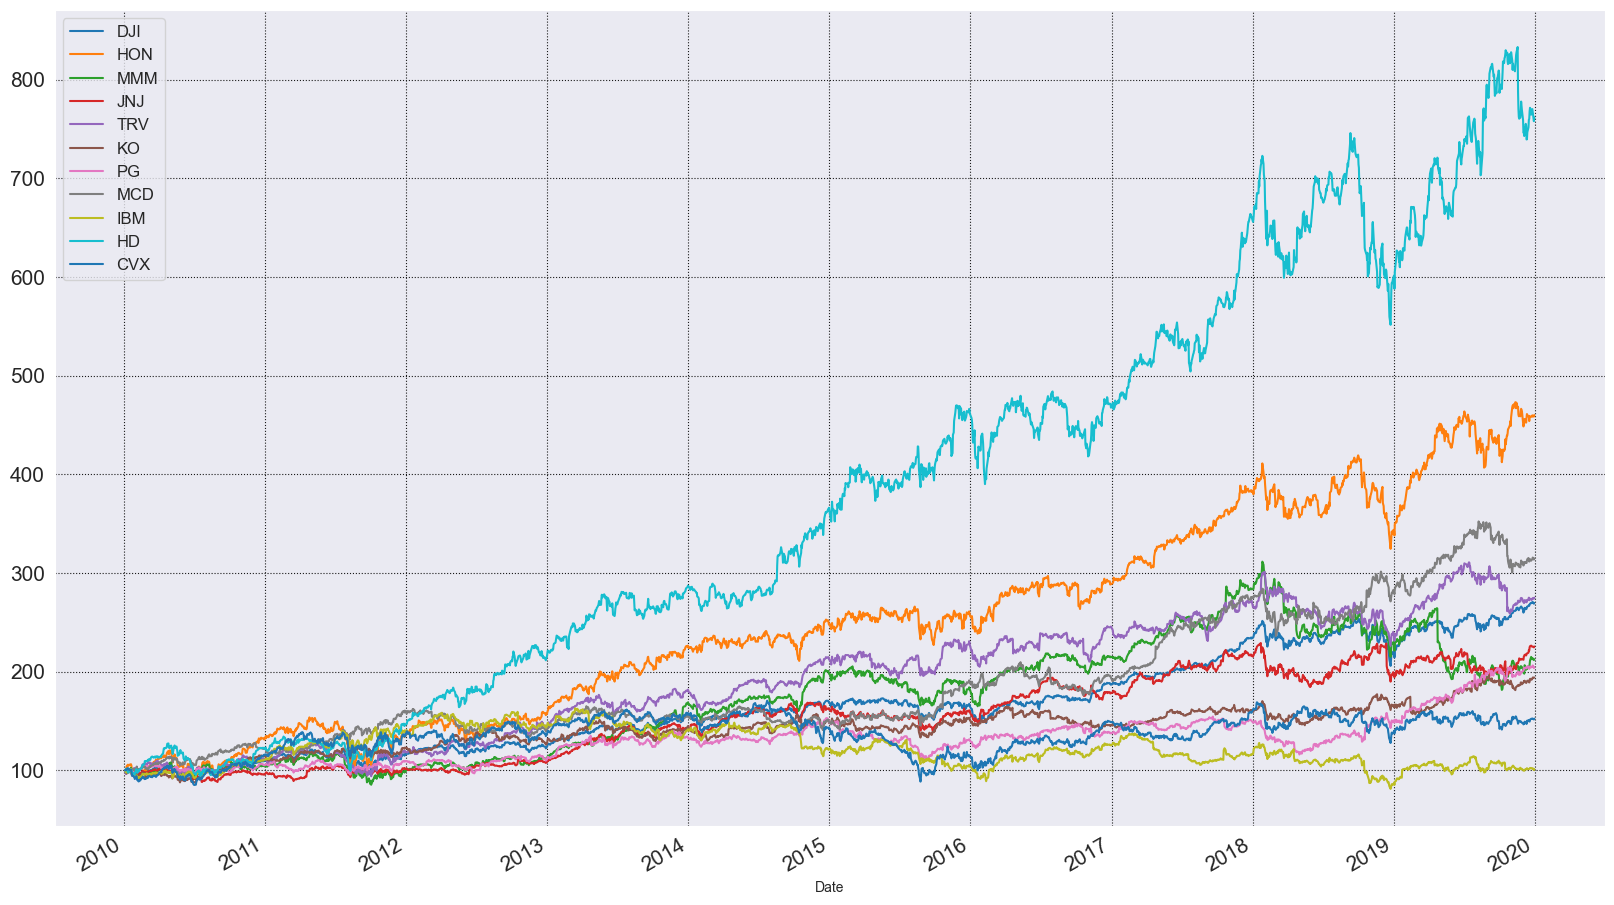

In [39]:
norm_track.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [40]:
tracking_stocks = tracking_stocks[1:]
tracking_stocks

Index(['HON', 'MMM', 'JNJ', 'TRV', 'KO', 'PG', 'MCD', 'IBM', 'HD', 'CVX'], dtype='object')

## Index Tracking - A simple Tracking Portfolio

In [41]:
tracking_stocks

Index(['HON', 'MMM', 'JNJ', 'TRV', 'KO', 'PG', 'MCD', 'IBM', 'HD', 'CVX'], dtype='object')

In [42]:
#equal weights (starting point of optimization)
eweights = np.full(noa, 1/noa)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [43]:
ret2.loc[:, tracking_stocks].mean(axis = 1)

Date
2010-01-04    0.008073
2010-01-05   -0.005665
2010-01-06   -0.002045
2010-01-07    0.003126
2010-01-08    0.001732
                ...   
2019-12-24   -0.001328
2019-12-26    0.001540
2019-12-27    0.001964
2019-12-30   -0.006843
2019-12-31    0.004209
Length: 2516, dtype: float64

In [44]:
ret2.loc[:, tracking_stocks].dot(eweights)

Date
2010-01-04    0.008073
2010-01-05   -0.005665
2010-01-06   -0.002045
2010-01-07    0.003126
2010-01-08    0.001732
                ...   
2019-12-24   -0.001328
2019-12-26    0.001540
2019-12-27    0.001964
2019-12-30   -0.006843
2019-12-31    0.004209
Length: 2516, dtype: float64

In [45]:
#calculate portfolio returns (based on weights)
def port_ret(weights):
    return ret2.loc[:, tracking_stocks].dot(weights)

#define function to be minimized -> minimize tracking error of tracking portfolio
def tracking_error (weights): 
     return port_ret(weights).sub(ret2.DJI).std() * np.sqrt(252)

In [46]:
tracking_error(eweights)

0.045674842806335034

In [47]:
ew_port = port_ret(eweights)[1:].add(1).cumprod().mul(100)
ew_port

Date
2010-01-05     99.433463
2010-01-06     99.230142
2010-01-07     99.540384
2010-01-08     99.712778
2010-01-11     99.826163
                 ...    
2019-12-24    269.010299
2019-12-26    269.424466
2019-12-27    269.953510
2019-12-30    268.106185
2019-12-31    269.234515
Length: 2515, dtype: float64

In [48]:
norm_track["EW_Port"] = ew_port
norm_track.iloc[0, -1] = 100

In [49]:
norm_track

DJI         HON         MMM         JNJ         TRV  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05   99.887184  100.198269   99.373649   98.840445   97.630997   
2010-01-06   99.902869  100.198269  100.782946   99.644398   96.245728   
2010-01-07  100.216369  102.131348  100.855224   98.933212   97.630997   
2010-01-08  100.323418  104.386621  101.565891   99.273344   97.490464   
...                ...         ...         ...         ...         ...   
2019-12-24  269.421363  458.323513  212.816189  225.618417  272.696242   
2019-12-26  270.422325  459.805265  212.707785  225.463824  273.619734   
2019-12-27  270.647847  458.765428  213.514818  225.340135  274.643644   
2019-12-30  268.917690  458.609463  211.792350  224.644407  274.021284   
2019-12-31  269.638581  460.117196  212.503018  225.525656  274.944776   

                    KO          PG         MCD         IBM          HD  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05   98.790318  100.032723   99.235426   98.792000  100.732470   
2010-01-06   98.755261   99.558245   97.881494   98.150247  100.383678   
2010-01-07   98.509814   99.018327   98.598284   97.810499  101.569588   
2010-01-08   96.686537   98.887434   98.502710   98.792000  101.081268   
...                ...         ...         ...         ...         ...   
2019-12-24  191.830288  204.875660  313.268560  101.910156  769.689563   
2019-12-26  192.917250  204.875660  313.889776  101.857303  770.212789   
2019-12-27  194.074325  206.299081  315.657856  102.129111  767.247997   
2019-12-30  193.793827  203.648566  313.650856  100.271802  757.969993   
2019-12-31  194.074325  204.352100  314.765856  101.200450  761.702143   

                   CVX     EW_Port  
Date                                
2010-01-04  100.000000  100.000000  
2010-01-05  100.708329   99.433463  
2010-01-06  100.720971   99.230142  
2010-01-07  100.341518   99.540384  
2010-01-08  100.518598   99.712778  
...                ...         ...  
2019-12-24  152.213509  269.010299  
2019-12-26  152.542376  269.424466  
2019-12-27  152.162923  269.953510  
2019-12-30  151.593729  268.106185  
2019-12-31  152.428543  269.234515  

[2516 rows x 12 columns]

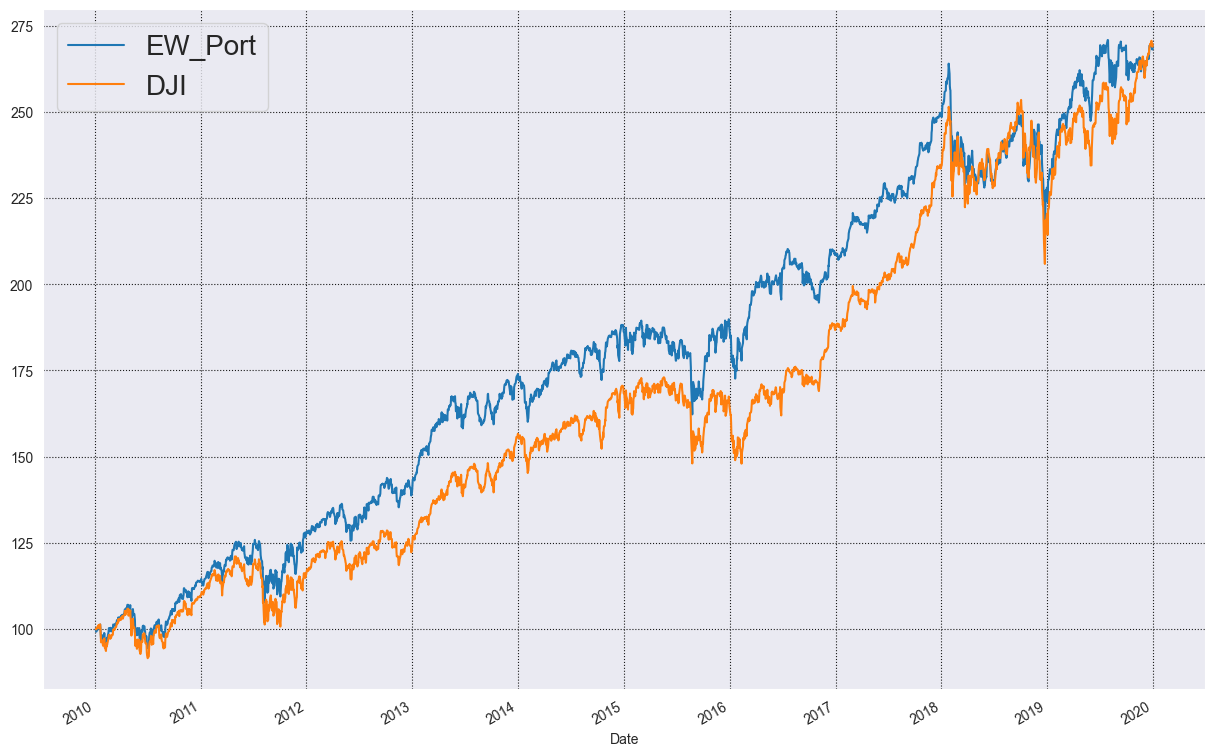

In [50]:
norm_track[["EW_Port", "DJI"]].plot(figsize = (15, 10))
plt.legend(fontsize = 20, loc = 2)
plt.show()

## Index Tracking - The optimal Tracking Portfolio

In [51]:
import scipy.optimize as sco #import scipy optimize

#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [52]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0,1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

### Look this up!!!!!!!!!!!!!!

In [53]:
#run optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints
opts = sco.minimize(tracking_error, eweights, method = "SLSQP", bounds = bnds, constraints= cons)

#output of optimization
opts

     fun: 0.041413501759101974
     jac: array([0.00684504, 0.00705543, 0.00697646, 0.00690827, 0.00730104,
       0.00667658, 0.00713857, 0.00717789, 0.00681295, 0.00642813])
 message: 'Optimization terminated successfully'
    nfev: 67
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.14442608, 0.13601745, 0.10356062, 0.09770196, 0.02496729,
       0.05355661, 0.07488053, 0.13666714, 0.10713948, 0.12108284])

In [54]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.14442608, 0.13601745, 0.10356062, 0.09770196, 0.02496729,
       0.05355661, 0.07488053, 0.13666714, 0.10713948, 0.12108284])

In [55]:
pd.Series(index = tracking_stocks, data = optimal_weights)

HON    0.144426
MMM    0.136017
JNJ    0.103561
TRV    0.097702
KO     0.024967
PG     0.053557
MCD    0.074881
IBM    0.136667
HD     0.107139
CVX    0.121083
dtype: float64

In [56]:
opt_port = port_ret(optimal_weights)[1:].add(1).cumprod().mul(100)
opt_port

Date
2010-01-05     99.505348
2010-01-06     99.391607
2010-01-07     99.797455
2010-01-08    100.279235
2010-01-11    100.259802
                 ...    
2019-12-24    271.630224
2019-12-26    271.959189
2019-12-27    272.256430
2019-12-30    270.317492
2019-12-31    271.564777
Length: 2515, dtype: float64

In [57]:
norm_track["Opt_Port"] = opt_port
norm_track.iloc[0, -1] = 100
norm_track

DJI         HON         MMM         JNJ         TRV  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05   99.887184  100.198269   99.373649   98.840445   97.630997   
2010-01-06   99.902869  100.198269  100.782946   99.644398   96.245728   
2010-01-07  100.216369  102.131348  100.855224   98.933212   97.630997   
2010-01-08  100.323418  104.386621  101.565891   99.273344   97.490464   
...                ...         ...         ...         ...         ...   
2019-12-24  269.421363  458.323513  212.816189  225.618417  272.696242   
2019-12-26  270.422325  459.805265  212.707785  225.463824  273.619734   
2019-12-27  270.647847  458.765428  213.514818  225.340135  274.643644   
2019-12-30  268.917690  458.609463  211.792350  224.644407  274.021284   
2019-12-31  269.638581  460.117196  212.503018  225.525656  274.944776   

                    KO          PG         MCD         IBM          HD  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05   98.790318  100.032723   99.235426   98.792000  100.732470   
2010-01-06   98.755261   99.558245   97.881494   98.150247  100.383678   
2010-01-07   98.509814   99.018327   98.598284   97.810499  101.569588   
2010-01-08   96.686537   98.887434   98.502710   98.792000  101.081268   
...                ...         ...         ...         ...         ...   
2019-12-24  191.830288  204.875660  313.268560  101.910156  769.689563   
2019-12-26  192.917250  204.875660  313.889776  101.857303  770.212789   
2019-12-27  194.074325  206.299081  315.657856  102.129111  767.247997   
2019-12-30  193.793827  203.648566  313.650856  100.271802  757.969993   
2019-12-31  194.074325  204.352100  314.765856  101.200450  761.702143   

                   CVX     EW_Port    Opt_Port  
Date                                            
2010-01-04  100.000000  100.000000  100.000000  
2010-01-05  100.708329   99.433463   99.505348  
2010-01-06  100.720971   99.230142   99.391607  
2010-01-07  100.341518   99.540384   99.797455  
2010-01-08  100.518598   99.712778  100.279235  
...                ...         ...         ...  
2019-12-24  152.213509  269.010299  271.630224  
2019-12-26  152.542376  269.424466  271.959189  
2019-12-27  152.162923  269.953510  272.256430  
2019-12-30  151.593729  268.106185  270.317492  
2019-12-31  152.428543  269.234515  271.564777  

[2516 rows x 13 columns]

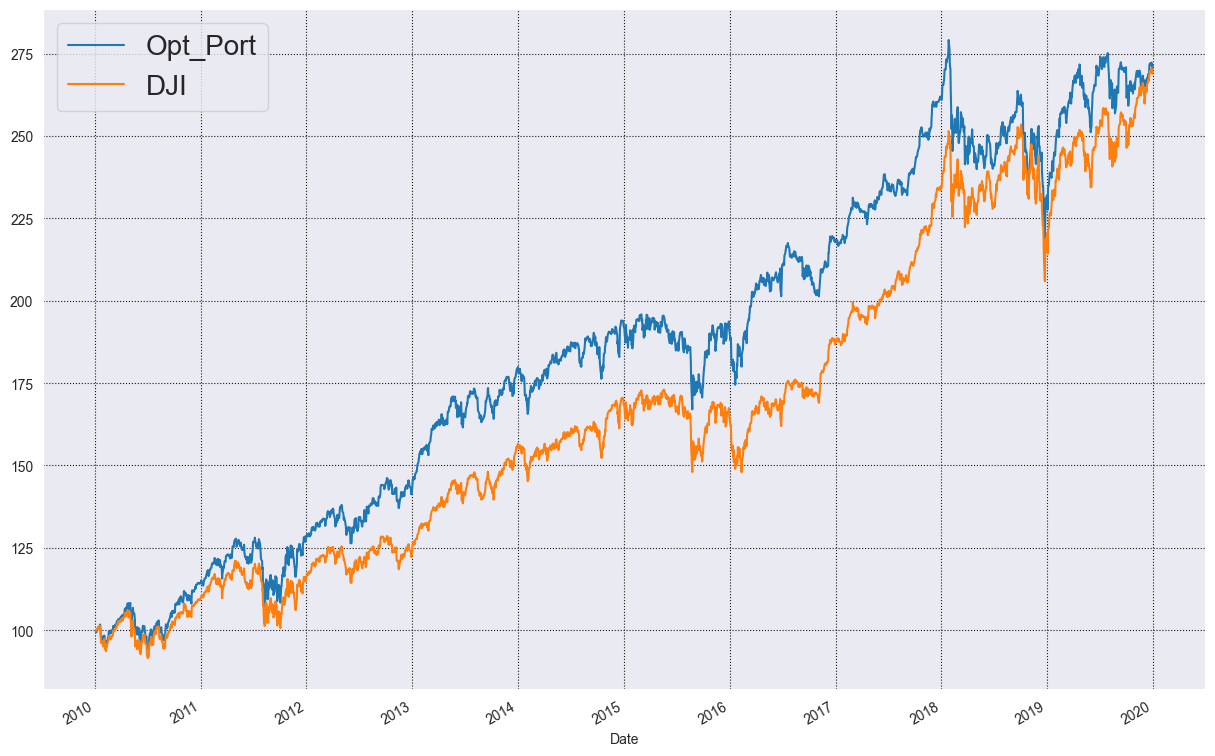

In [58]:
norm_track[["Opt_Port", "DJI"]].plot(figsize = (15, 10))
plt.legend(fontsize = 20, loc = 2)
plt.show()

In [59]:
summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())

Return      Risk
Opt_Port  0.109453  0.136526
EW_Port   0.107416  0.127661
DJI       0.109306  0.140573

## Forward Testing (Part 1)

In [60]:
df

AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2000-09-01    1.132813   76.437500   51.150345   54.750000   18.656250   
2000-09-05    1.114955   72.500000   52.299175   55.437500   19.031250   
2000-09-06    1.043527   68.062500   52.518002   57.812500   19.343750   
2000-09-07    1.107143   72.000000   51.916229   58.500000   19.031250   
2000-09-08    1.051339   74.937500   53.065063   58.125000   18.906250   
...                ...         ...         ...         ...         ...   
2023-08-25  178.610001  256.380005  158.320007  223.410004  272.559998   
2023-08-28  180.190002  256.549988  159.190002  227.059998  274.790009   
2023-08-29  184.119995  259.640015  160.240005  227.250000  280.029999   
2023-08-30  187.649994  257.880005  160.169998  228.850006  282.329987   
2023-08-31  187.869995  256.339996  157.990005  224.029999  281.130005   

                   CRM       CSCO         CVX        DIS        DOW  ...  \
Date                                                                 ...   
2000-09-01         NaN  68.562500   42.734375  38.473499        NaN  ...   
2000-09-05         NaN  66.000000   42.968750  38.103561        NaN  ...   
2000-09-06         NaN  64.250000   44.062500  39.459999        NaN  ...   
2000-09-07         NaN  66.250000   44.156250  40.939751        NaN  ...   
2000-09-08         NaN  63.875000   43.343750  39.706627        NaN  ...   
...                ...        ...         ...        ...        ...  ...   
2023-08-25  209.470001  55.700001  159.119995  83.360001  53.980000  ...   
2023-08-28  211.720001  56.200001  160.210007  84.160004  54.599998  ...   
2023-08-29  211.960007  56.560001  159.960007  84.400002  55.240002  ...   
2023-08-30  215.039993  56.810001  160.179993  84.279999  54.750000  ...   
2023-08-31  221.460007  57.349998  161.100006  83.680000  54.560001  ...   

                  MSFT         NKE          PG         TRV         UNH  \
Date                                                                     
2000-09-01   35.093750    5.109375   30.687500   46.812500   11.742188   
2000-09-05   35.062500    5.210938   31.250000   47.125000   11.796875   
2000-09-06   34.718750    5.000000   31.718750   48.312500   11.562500   
2000-09-07   35.031250    4.828125   31.312500   48.375000   11.476563   
2000-09-08   34.656250    4.890625   31.718750   49.312500   11.312500   
...                ...         ...         ...         ...         ...   
2023-08-25  322.980011   98.839996  153.539993  161.639999  489.119995   
2023-08-28  323.700012   99.629997  153.779999  160.830002  491.279999   
2023-08-29  328.410004  101.769997  153.869995  161.279999  492.829987   
2023-08-30  328.790009  102.099998  154.039993  161.320007  491.529999   
2023-08-31  327.760010  101.709999  154.339996  161.229996  476.579987   

                     V         VZ        WBA         WMT           DJI  
Date                                                                    
2000-09-01         NaN  39.626408  33.437500   48.750000  11238.780273  
2000-09-05         NaN  39.120541  33.937500   49.750000  11260.610352  
2000-09-06         NaN  38.333633  33.562500   50.000000  11310.639648  
2000-09-07         NaN  39.232956  33.625000   51.000000  11259.870117  
2000-09-08         NaN  39.851238  35.187500   52.125000  11220.650391  
...                ...        ...        ...         ...           ...  
2023-08-25  242.570007  33.349998  25.260000  157.820007  34346.898438  
2023-08-28  243.830002  33.549999  25.170000  158.720001  34559.980469  
2023-08-29  245.339996  34.689999  25.540001  160.050003  34852.671875  
2023-08-30  246.229996  34.639999  25.600000  161.199997  34890.238281  
2023-08-31  245.679993  34.980000  25.309999  162.610001  34721.910156  

[5785 rows x 31 columns]

In [61]:
ret

AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2000-09-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-09-05 -0.015764 -0.051513  0.022460  0.012557  0.020101       NaN   
2000-09-06 -0.064064 -0.061207  0.004184  0.042841  0.016420       NaN   
2000-09-07  0.060963  0.057851 -0.011458  0.011892 -0.016155       NaN   
2000-09-08 -0.050404  0.040799  0.022129 -0.006410 -0.006568       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-08-25  0.012643 -0.000935  0.003359  0.028071  0.012105  0.019269   
2023-08-28  0.008846  0.000663  0.005495  0.016338  0.008182  0.010741   
2023-08-29  0.021810  0.012045  0.006596  0.000837  0.019069  0.001134   
2023-08-30  0.019172 -0.006779 -0.000437  0.007041  0.008213  0.014531   
2023-08-31  0.001172 -0.005972 -0.013610 -0.021062 -0.004250  0.029855   

                CSCO       CVX       DIS       DOW  ...      MSFT       NKE  \
Date                                                ...                       
2000-09-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-09-05 -0.037375  0.005484 -0.009615       NaN  ... -0.000890  0.019878   
2000-09-06 -0.026515  0.025455  0.035599       NaN  ... -0.009804 -0.040480   
2000-09-07  0.031128  0.002128  0.037500       NaN  ...  0.009001 -0.034375   
2000-09-08 -0.035849 -0.018401 -0.030120       NaN  ... -0.010705  0.012945   
...              ...       ...       ...       ...  ...       ...       ...   
2023-08-25  0.008327  0.007471  0.010792  0.008218  ...  0.009407  0.012394   
2023-08-28  0.008977  0.006850  0.009597  0.011486  ...  0.002229  0.007993   
2023-08-29  0.006406 -0.001560  0.002852  0.011722  ...  0.014550  0.021479   
2023-08-30  0.004420  0.001375 -0.001422 -0.008870  ...  0.001157  0.003243   
2023-08-31  0.009505  0.005744 -0.007119 -0.003470  ... -0.003133 -0.003820   

                  PG       TRV       UNH         V        VZ       WBA  \
Date                                                                     
2000-09-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-09-05  0.018330  0.006676  0.004657       NaN -0.012766  0.014953   
2000-09-06  0.015000  0.025199 -0.019868       NaN -0.020115 -0.011050   
2000-09-07 -0.012808  0.001294 -0.007432       NaN  0.023460  0.001862   
2000-09-08  0.012974  0.019380 -0.014296       NaN  0.015759  0.046468   
...              ...       ...       ...       ...       ...       ...   
2023-08-25  0.006556 -0.001236  0.002090  0.012945 -0.000899 -0.002370   
2023-08-28  0.001563 -0.005011  0.004416  0.005194  0.005997 -0.003563   
2023-08-29  0.000585  0.002798  0.003155  0.006193  0.033979  0.014700   
2023-08-30  0.001105  0.000248 -0.002638  0.003628 -0.001441  0.002349   
2023-08-31  0.001948 -0.000558 -0.030415 -0.002234  0.009815 -0.011328   

                 WMT       DJI  
Date                            
2000-09-01       NaN       NaN  
2000-09-05  0.020513  0.001942  
2000-09-06  0.005025  0.004443  
2000-09-07  0.020000 -0.004489  
2000-09-08  0.022059 -0.003483  
...              ...       ...  
2023-08-25  0.005928  0.007258  
2023-08-28  0.005703  0.006204  
2023-08-29  0.008380  0.008469  
2023-08-30  0.007185  0.001078  
2023-08-31  0.008747 -0.004825  

[5785 rows x 31 columns]

In [62]:
tracking_stocks

Index(['HON', 'MMM', 'JNJ', 'TRV', 'KO', 'PG', 'MCD', 'IBM', 'HD', 'CVX'], dtype='object')

In [63]:
def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)   

In [64]:
def visual(data, tracking_stocks, weights, index, start, end):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = (12,8))
    track.plot()
    index.plot()
    plt.legend(fontsize = 20, loc = 2)
    plt.show()

In [65]:
tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", "2010-01-01", "2019-12-31")

0.041413501759101974

In [66]:
forward_te = tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", 
                                "2020-01-01", "2021-12-31")
forward_te

0.07743906855789595

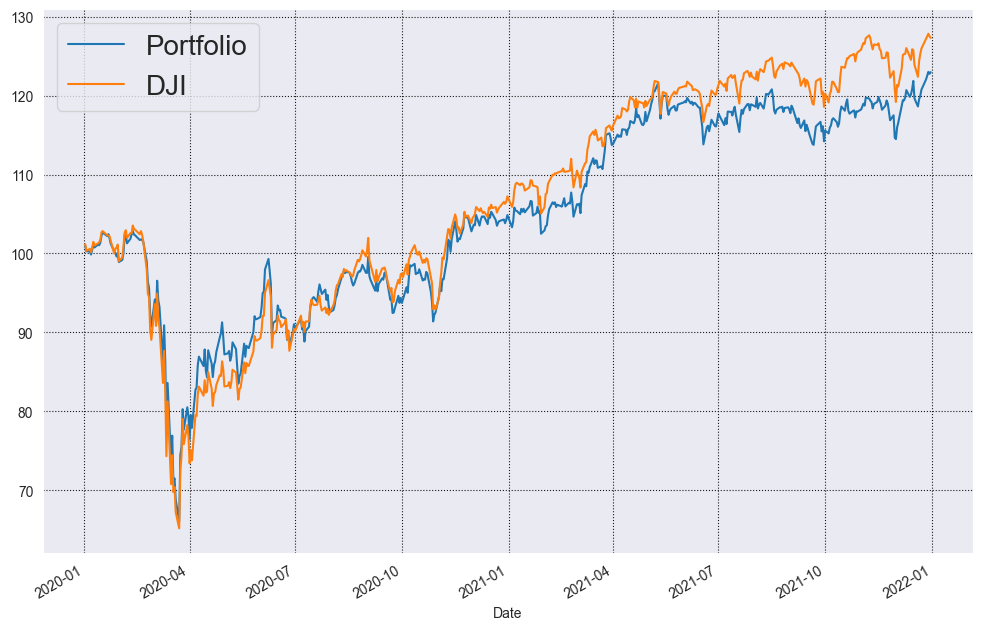

In [67]:
visual(ret, tracking_stocks, optimal_weights, "DJI", "2020-01-01", "2021-12-31")

## Forward Testing (Part 2)

In [68]:
bucket = df.columns.drop(["DOW", "DJI"])
bucket

Index(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'GS',
       'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK',
       'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'],
      dtype='object')

In [69]:
np.random.choice(bucket, size = noa, replace = False)

array(['MRK', 'WMT', 'BA', 'CRM', 'AXP', 'GS', 'CVX', 'V', 'AMGN', 'TRV'],
      dtype=object)

In [70]:
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()
random_weights.sum()

1.0

In [71]:
np.random.seed(123)
random_stocks = np.random.choice(bucket, size = noa, replace = False)
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()

In [72]:
print(random_stocks, random_weights)

['CVX' 'WMT' 'CRM' 'V' 'DIS' 'VZ' 'IBM' 'NKE' 'HON' 'PG'] [0.0858475  0.05974735 0.098733   0.14853474 0.07177554 0.08370995
 0.13136476 0.07500036 0.04705319 0.19823361]


In [73]:
tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2020-01-01", "2021-12-31")

0.07555345454997378

In [74]:
forward_te

0.07743906855789595

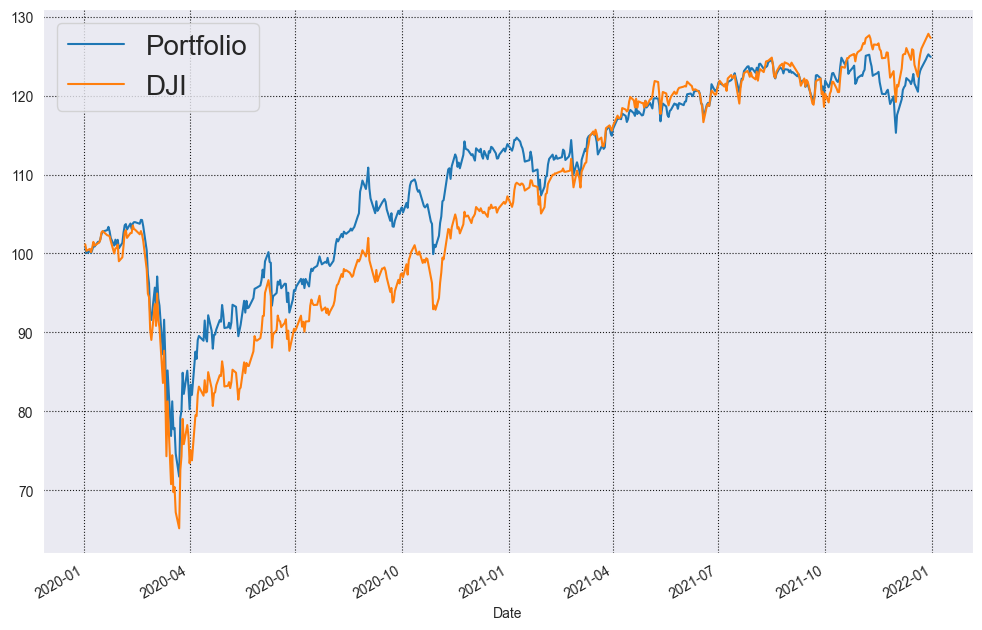

In [75]:
visual(ret, random_stocks, random_weights, "DJI", "2020-01-01", "2021-12-31")

In [76]:
tes = np.empty(10000)
np.random.seed(123)
for i in range(10000):
    random_numbers = np.random.random(noa)
    random_weights = random_numbers / random_numbers.sum()
    random_stocks = np.random.choice(bucket, size = noa, replace = False)
       
    tes[i] = tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2020-01-01", "2021-12-31")

In [77]:
(tes < forward_te).mean()

0.3086

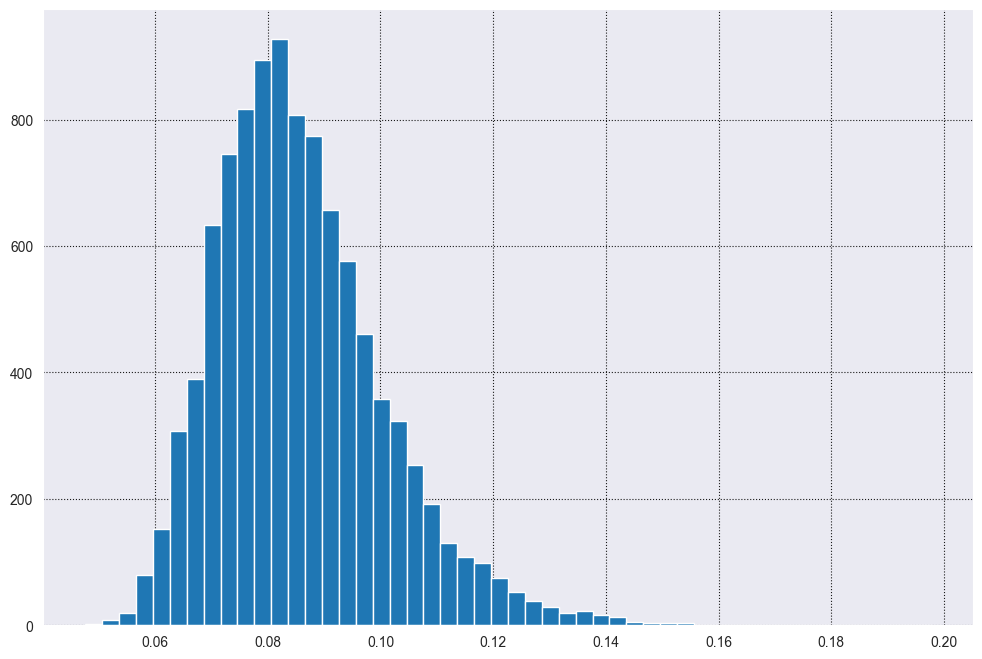

In [78]:
plt.figure(figsize = (12, 8))
plt.hist(tes, bins = 50)
plt.show()